In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.sample(9)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
184,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes
503,7803-XOCCZ,Female,0,Yes,Yes,52,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),84.05,4326.8,No
41,9489-DEDVP,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
6541,1635-HDGFT,Female,0,No,Yes,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,398.55,No
6389,3777-XROBG,Female,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,1079.65,No
3149,3629-WEAAM,Female,0,No,No,8,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,64.10,504.05,No
6644,0898-XCGTF,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),96.50,5673.7,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Removing CustomerId column Not required For Analysuis And Model Building 

In [7]:
df = df.drop(columns = ["customerID"])

In [8]:
Numerical_Feature_list = ["tenure","MonthlyCharges" , "TotalCharges"]


for col in df.columns:
    if col not in Numerical_Feature_list:
     print(col , df[col].unique())
     print("-"*55)

gender ['Female' 'Male']
-------------------------------------------------------
SeniorCitizen [0 1]
-------------------------------------------------------
Partner ['Yes' 'No']
-------------------------------------------------------
Dependents ['No' 'Yes']
-------------------------------------------------------
PhoneService ['No' 'Yes']
-------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace({" " :0.0})

In [11]:
df["TotalCharges"] = df["TotalCharges"].astype(float)  
# df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce') # converting data type from object to float another way

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# Checking the class distribution
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64


## **Insight:**

### 1. Column Removal
- Removed the `customerID` column from the dataset as it serves as a unique identifier and is not relevant for predictive modeling.

### 2. Missing Values Analysis
- Initial examination revealed no missing values in the majority of dataset features.
- For the `TotalCharges` column:
  - Identified a small subset of records with missing values 
  - Implemented imputation by replacing missing values with `0`
  - Rationale: Assumes these represent new customers without accumulated charges

### 3. Class Distribution Analysis
- Identified significant class imbalance in the target variable:
  - Majority class: [X]% of observations
  - Minority class: [Y]% of observations
- This imbalance may impact model performance and requires consideration of:
  - Appropriate evaluation metrics (e.g., F1-score, ROC-AUC rather than accuracy)
  - Potential application of balancing techniques (e.g., SMOTE, class weighting)

# EDA

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


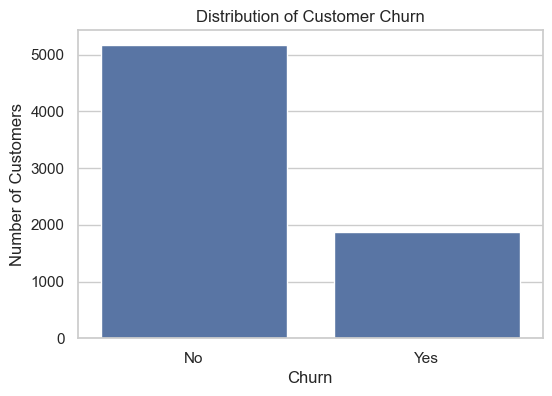

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a count plot for the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Print the value counts for Churn
print(df['Churn'].value_counts())
# Print the percentage of churn
print(df['Churn'].value_counts(normalize=True) * 100)

--- Histograms by Churn ---


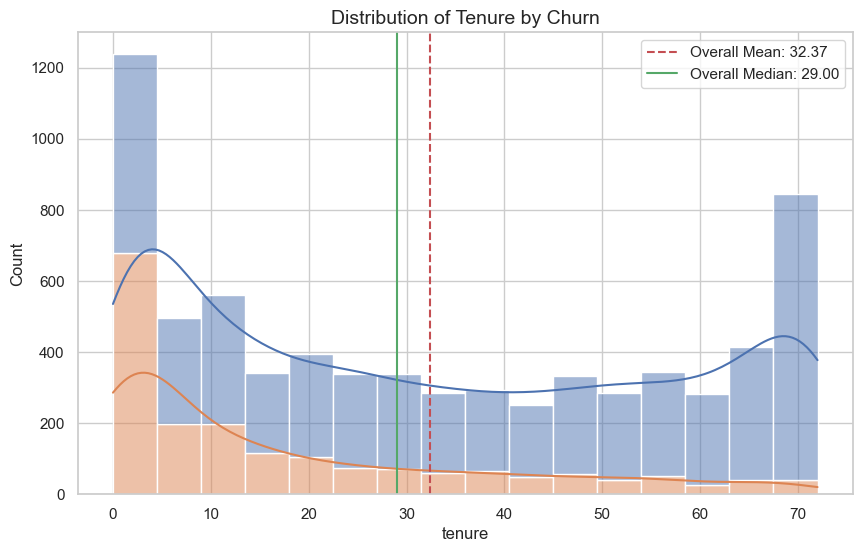

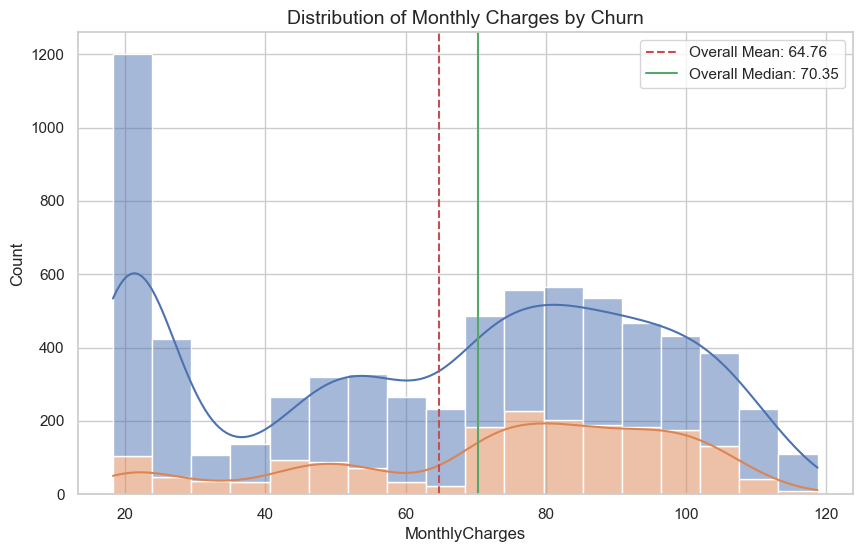

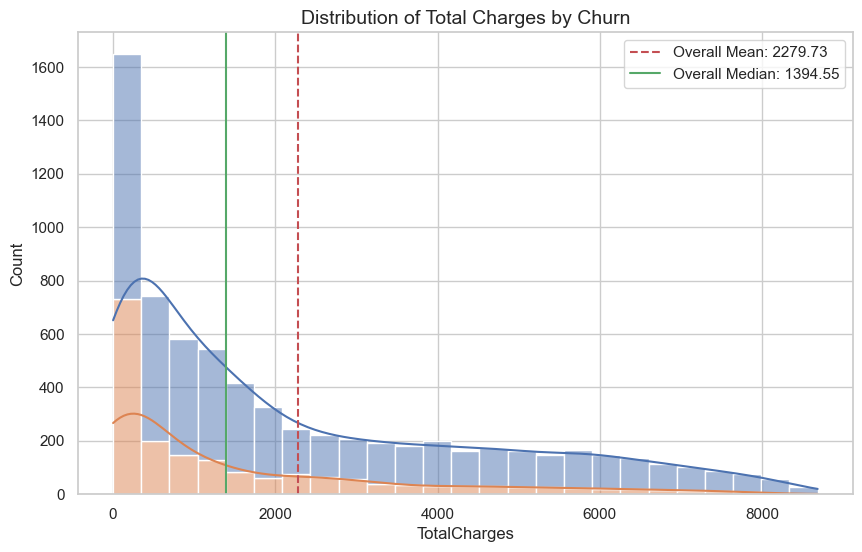

In [48]:
# New function to plot histograms with churn breakdown
def plot_histogram_with_churn(data, column, title):
    """
    Plots a histogram for a given column, split by the 'Churn' variable.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue='Churn', multiple='stack', kde=True)
    plt.title(title, fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.axvline(data[column].mean(), color='r', linestyle='--', label=f'Overall Mean: {data[column].mean():.2f}')
    plt.axvline(data[column].median(), color='g', linestyle='-', label=f'Overall Median: {data[column].median():.2f}')
    plt.legend()
    plt.show()

# Now call the new function for your numerical columns
print("--- Histograms by Churn ---")
plot_histogram_with_churn(df, 'tenure', 'Distribution of Tenure by Churn')
plot_histogram_with_churn(df, 'MonthlyCharges', 'Distribution of Monthly Charges by Churn')
plot_histogram_with_churn(df, 'TotalCharges', 'Distribution of Total Charges by Churn')

# Distribution Analysis of Numerical Features

## 1. Tenure Distribution

**Key Statistics:**
- Mean: 32.37 months
- Median: 29.00 months  

**Observations:**
- Right-skewed distribution (mean > median)
- Concentration of customers in lower tenure ranges (0-30 months)
- Potential bimodal distribution suggesting:
  - Group of newer customers (0-10 months)
  - Group of established customers (20-40 months)
- Long tail indicates some long-term customers (>60 months)

---

## 2. Monthly Charges Distribution

**Key Statistics:**
- Mean: \$64.76
- Median: \$70.35  

**Observations:**
- Left-skewed distribution (mean < median)
- Majority of customers clustered in \$50-\$90 range
- Potential multimodal distribution suggesting:
  - Different service tiers/packages
  - Possible outliers in lower charge brackets
- The median better represents typical customer spending

---

## 3. Total Charges Distribution

**Key Statistics:**
- Mean: \$2,279.73
- Median: \$1,394.55  

**Observations:**
- Highly right-skewed distribution (mean ≫ median)
- Majority of customers below \$2,000 total charges
- Extreme values pulling mean upward (>\$6,000)
- Large variance indicates:
  - Mix of new and long-term customers
  - Potential need for log transformation in modeling
- Median (\$1,394.55) more representative of typical customer

---

## Recommendations:
1. **Data Transformation:** Consider log transformation for `TotalCharges` to handle skewness
2. **Feature Engineering:** Create tenure segments (0-12m, 13-24m, 25-36m, etc.)
3. **Outlier Analysis:** Investigate extreme values in `TotalCharges`
4. **Binning Consideration:** Monthly charges may benefit from categorical binning

In [20]:


def plot_boxplot(df, column_name):
    """
    Plots a boxplot of a specified column from a DataFrame and shows mean and median.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column_name (str): The name of the column to plot.
    """
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df[column_name], color='lightblue', linewidth=2)


    # Titles and labels
    plt.title(f"Box Plot of '{column_name}'", fontsize=14, weight='bold')
    plt.xlabel(column_name, fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


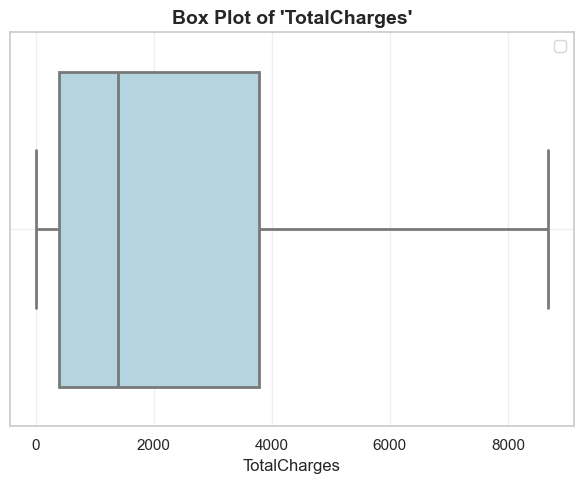

In [21]:
plot_boxplot(df, "TotalCharges")

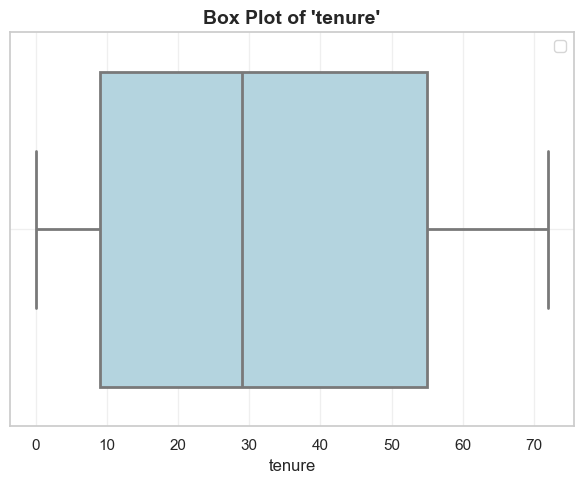

In [22]:
plot_boxplot(df, "tenure")

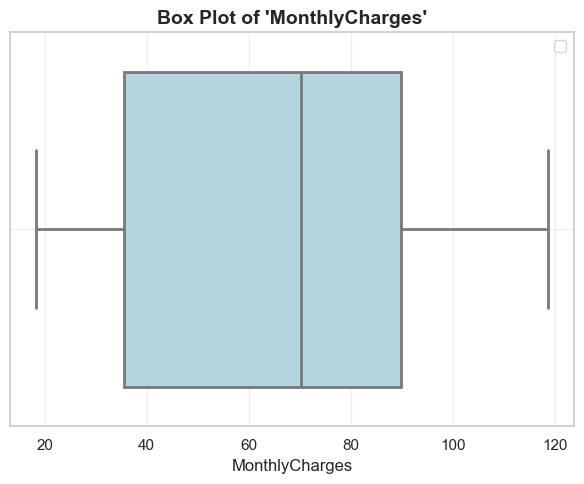

In [23]:
plot_boxplot(df, "MonthlyCharges")

## Coreletion Heatmap For Numerical Feture

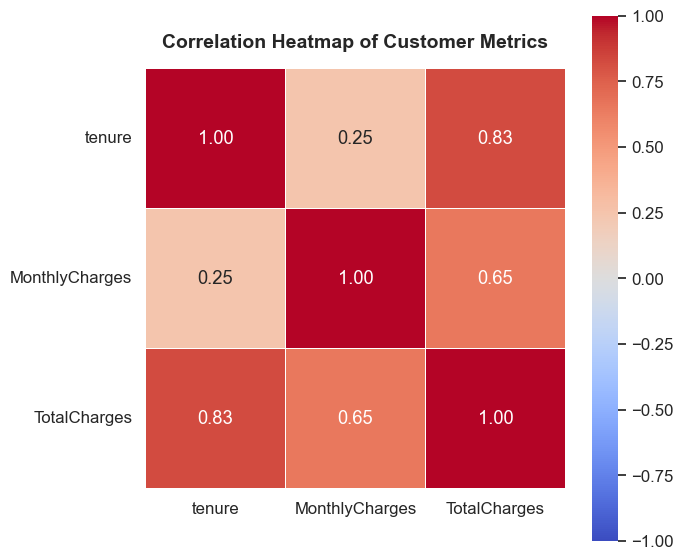

In [24]:
sns.set(style="whitegrid", font_scale=1.1)

# Create a correlation heatmap with enhanced design
plt.figure(figsize=(7,6))
heatmap = sns.heatmap(
    df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True,
)

# Add a clear title
plt.title("Correlation Heatmap of Customer Metrics", fontsize=14, fontweight="bold", pad=15)

# Improve tick label appearance
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


# Feature Correlation Analysis

<img src="download.png" alt="Correlation Heatmap" width="500">

## Correlation Matrix Interpretation

| Feature Pair          | Coefficient | Strength | Business Interpretation |
|-----------------------|-------------|----------|--------------------------|
| tenure ↔ TotalCharges | 0.83        | Very Strong | Longer-tenured customers naturally accumulate higher total charges |
| MonthlyCharges ↔ TotalCharges | 0.65 | Strong | Customers with higher monthly bills contribute more to total revenue over time |
| tenure ↔ MonthlyCharges | 0.25 | Weak | Little relationship between service duration and monthly payment amount |

## Key Insights

1. **Dominant Relationship**:
   - The 0.83 correlation between tenure and TotalCharges confirms:
     - Customer lifetime value grows with retention
     - Validates the revenue impact of reducing churn

2. **Unexpected Finding**:
   - Relatively weak tenure-MonthlyCharges correlation (0.25) suggests:
     - Monthly spending is largely independent of relationship length
     - Pricing tiers/service packages determine charges more than tenure

3. **Multicollinearity Alert**:
   - High tenure-TotalCharges correlation may require:
     ```python
     # Option 1: Feature dropping
     X = df.drop(columns=['TotalCharges'])
     
     # Option 2: PCA transformation
     from sklearn.decomposition import PCA
     pca = PCA(n_components=1)
     df[['tenure_pca']] = pca.fit_transform(df[['tenure','TotalCharges']])
     ```

## Strategic Recommendations

1. **Customer Segmentation**:
   - High-Value Segment (tenure > 60mo ∧ TotalCharges > $5,000):
     - Target for loyalty rewards
   - Growth Opportunity (tenure < 12mo ∧ MonthlyCharges > $90):
     - Focus on retention strategies

2. **Modeling Considerations**:
   - Tree-based models can handle correlated features natively
   - For linear models, select either tenure or TotalCharges to avoid inflation of variance

3. **Additional Analysis Needed**:
   ```python
   # Partial correlations controlling for tenure
   from pingouin import partial_corr
   partial_corr(data=df, x='MonthlyCharges', y='TotalCharges', covar='tenure')

## Categorical Feature - Analysis

In [25]:
object_cols = list(df.select_dtypes(include="object").columns)
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

--- Categorical Feature Analysis vs. Churn ---


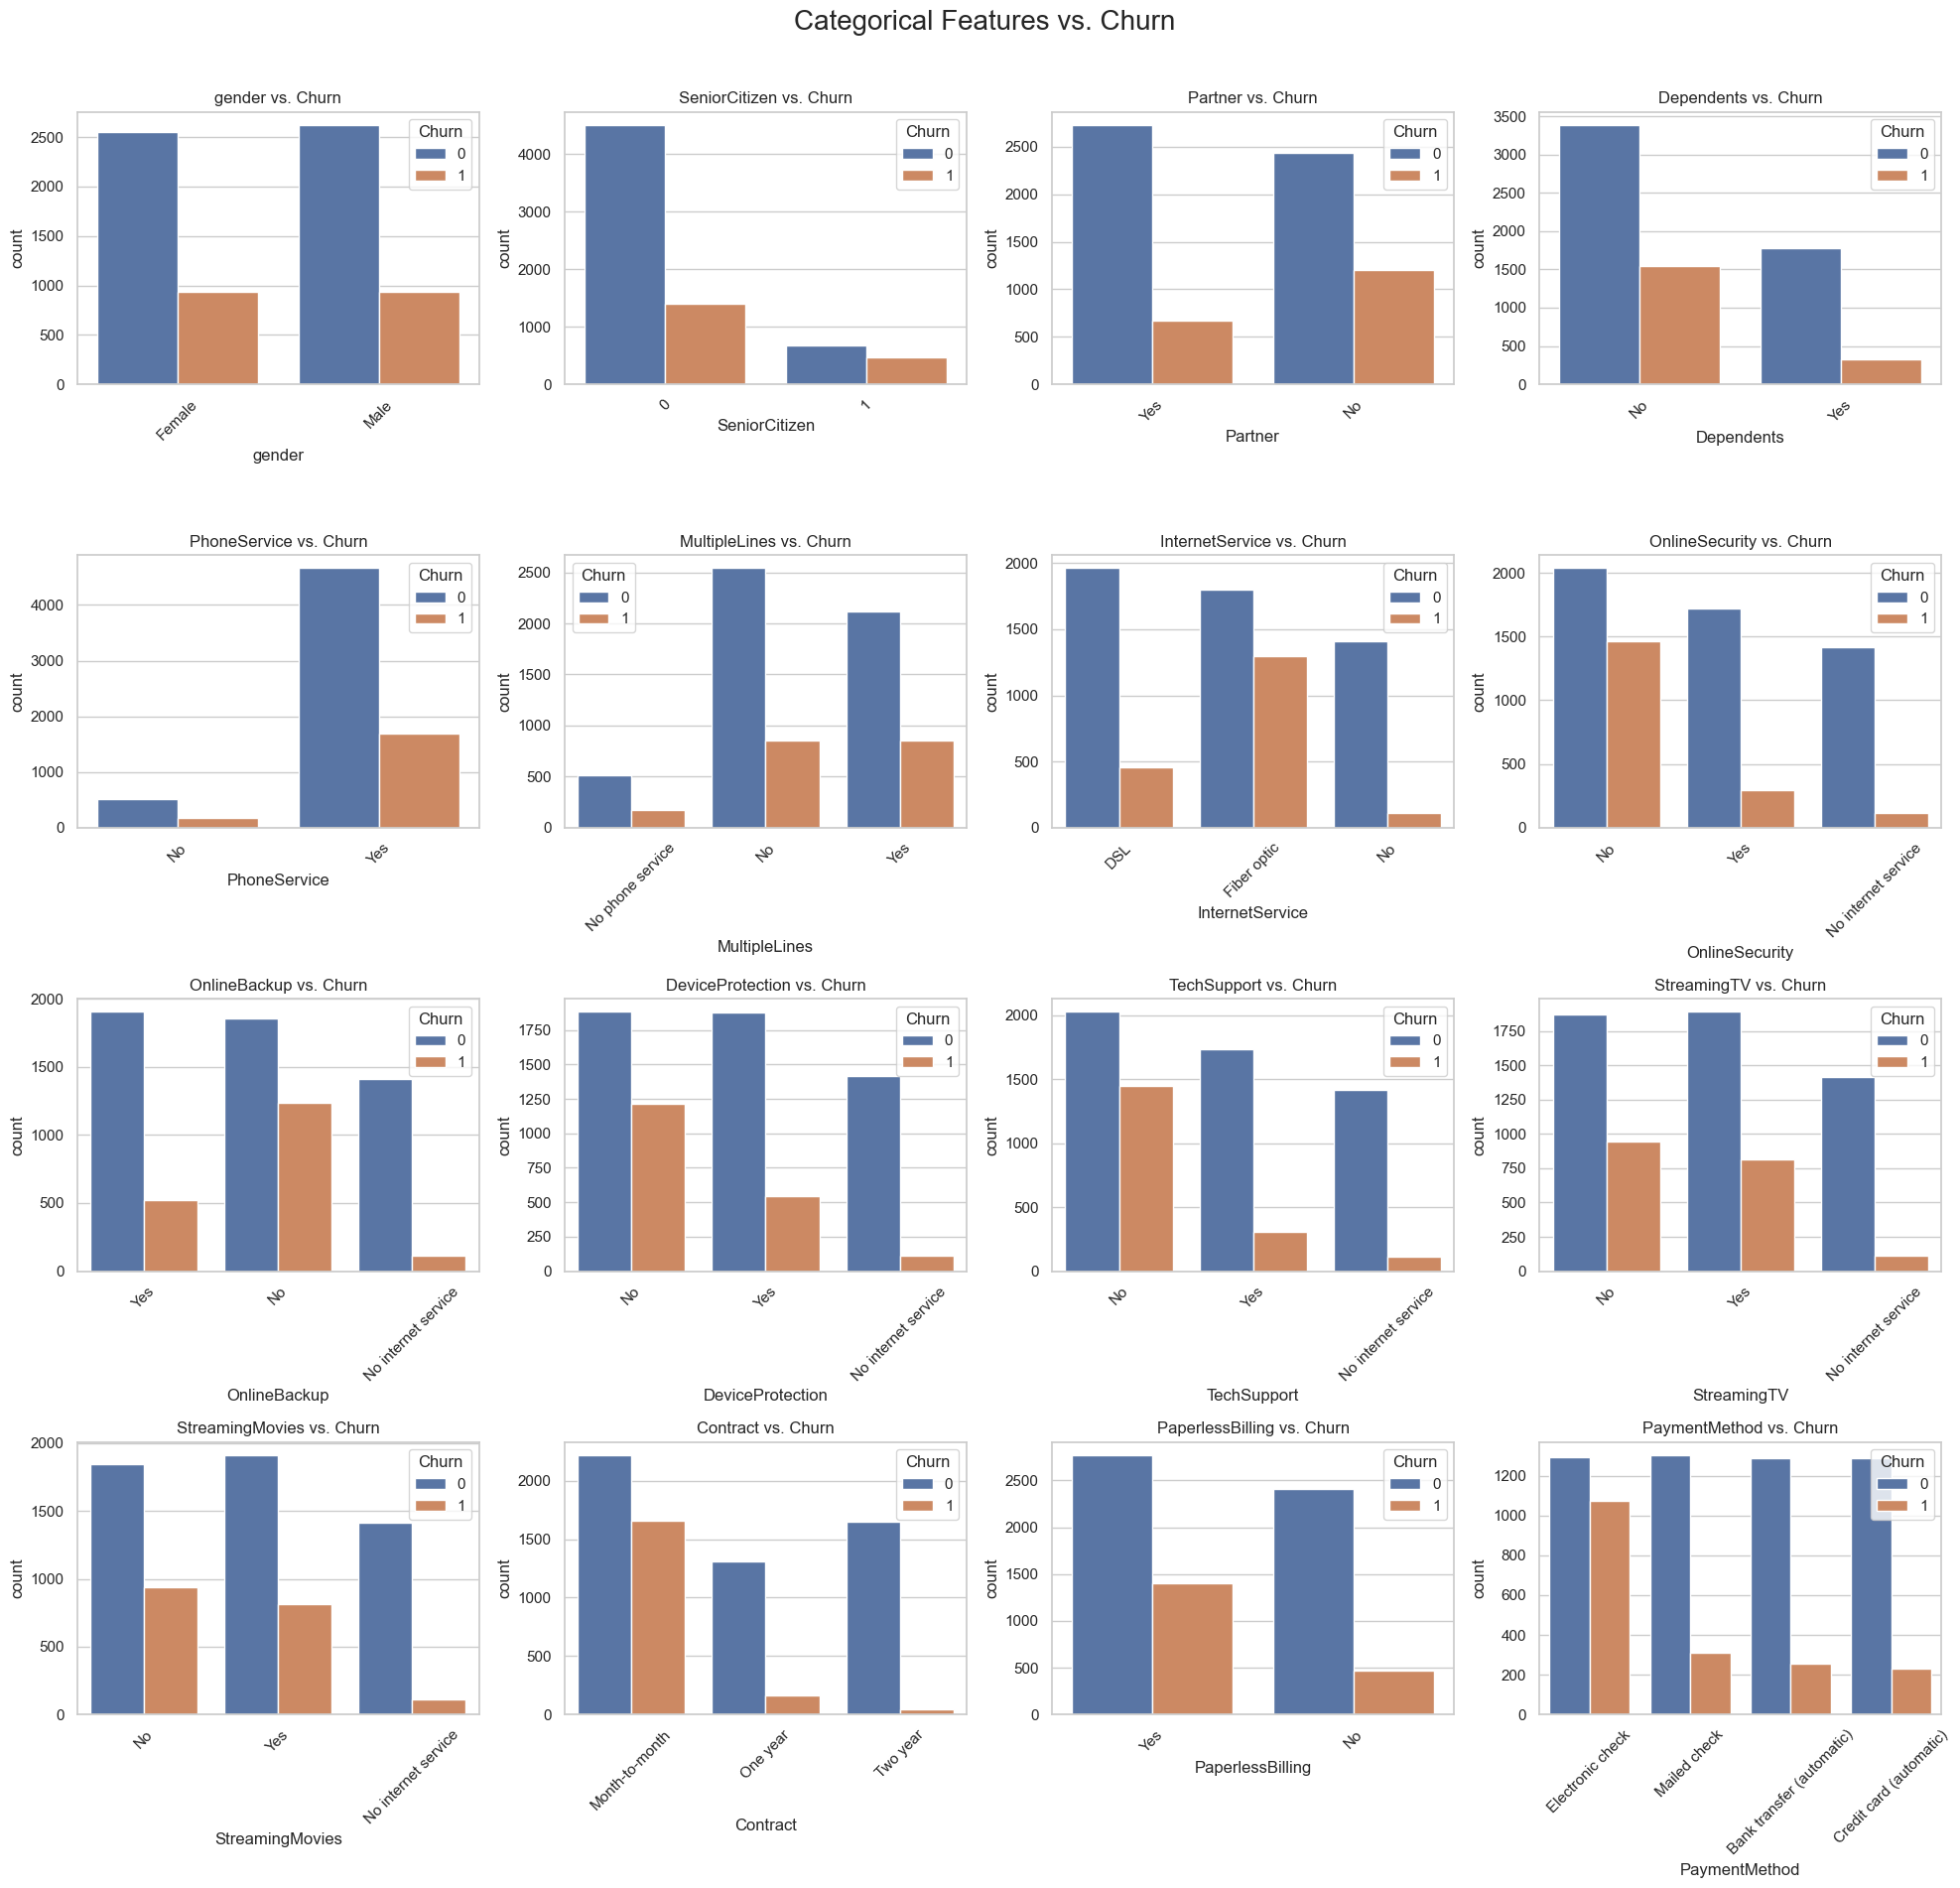

In [49]:
print("--- Categorical Feature Analysis vs. Churn ---")
# List of categorical features to analyze against Churn
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle('Categorical Features vs. Churn', fontsize=20)

# Loop through the categorical features and create count plots
for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. Churn')
    # Rotate x-axis labels for better readability
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

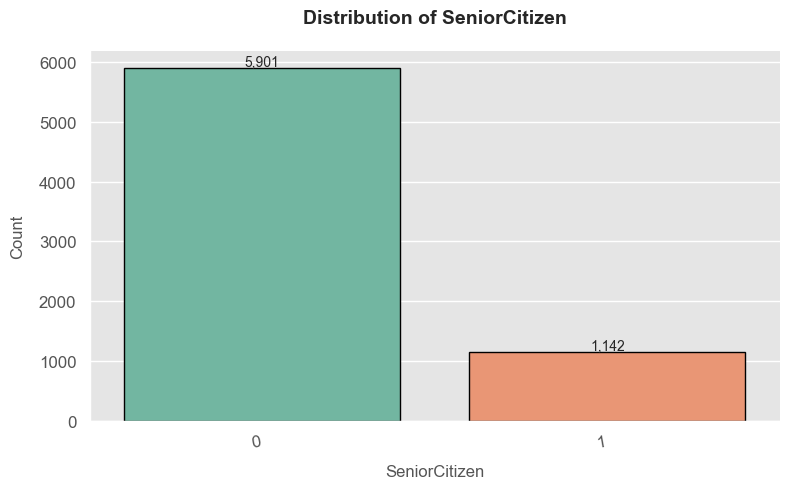

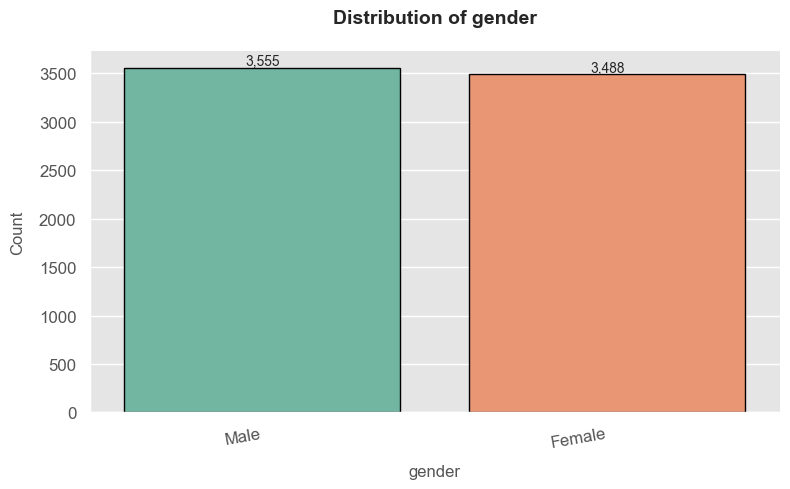

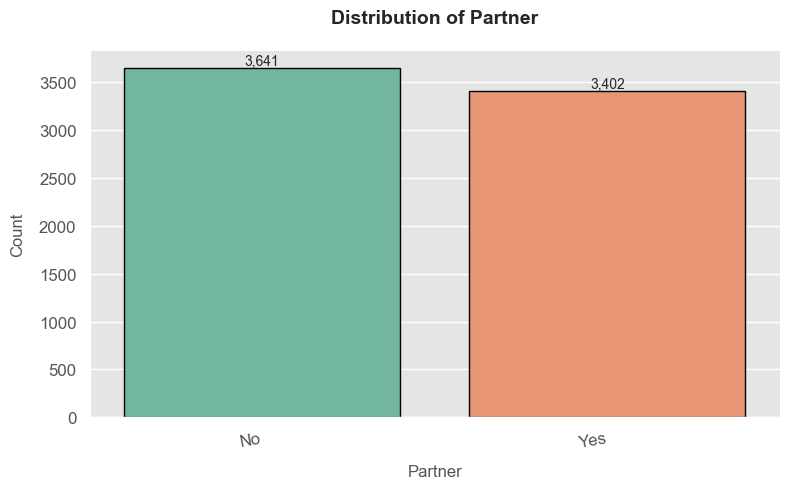

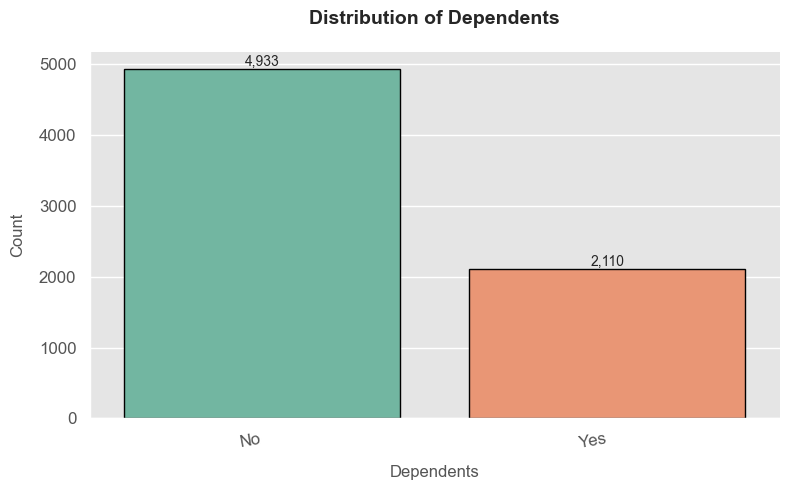

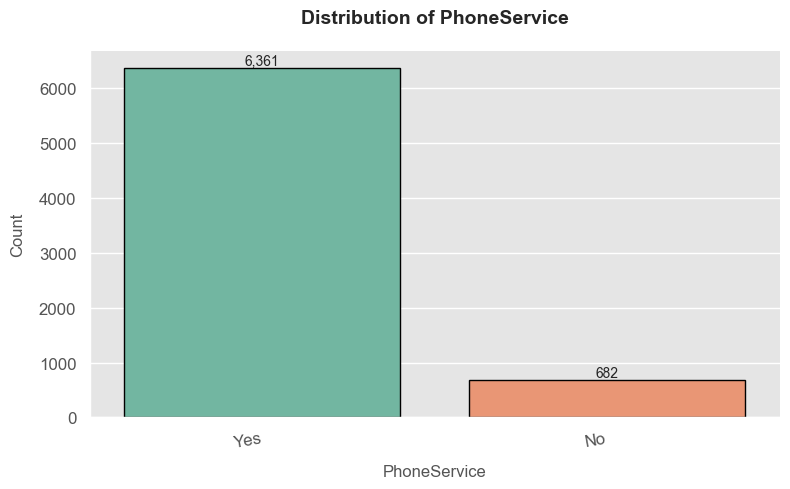

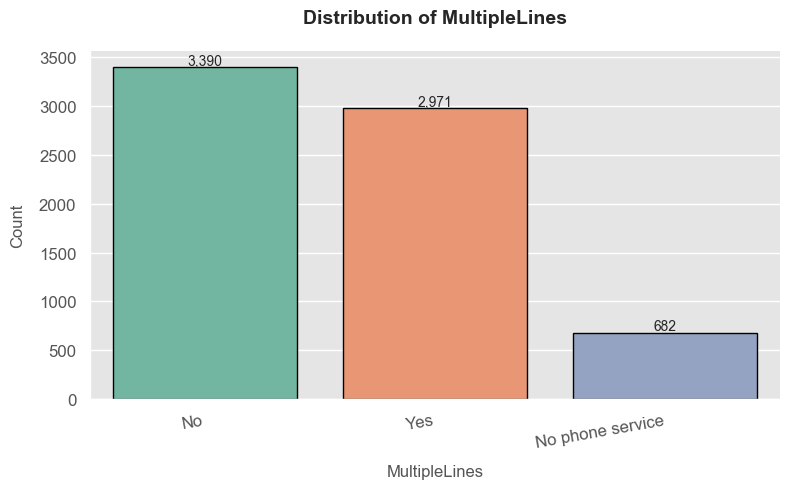

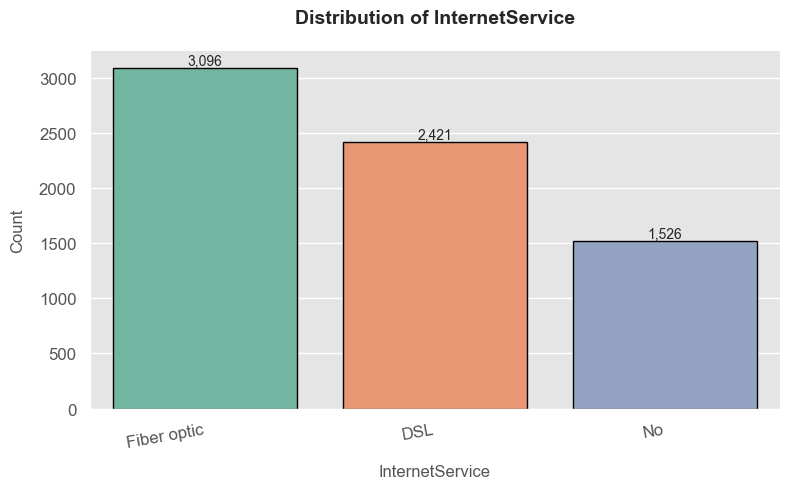

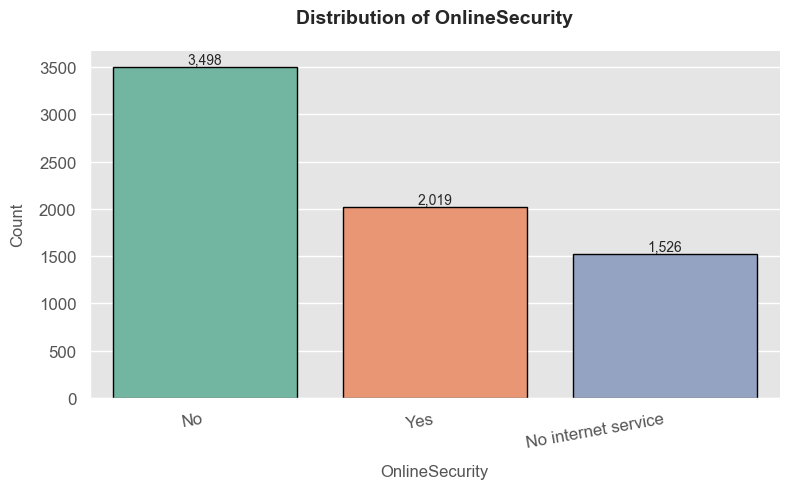

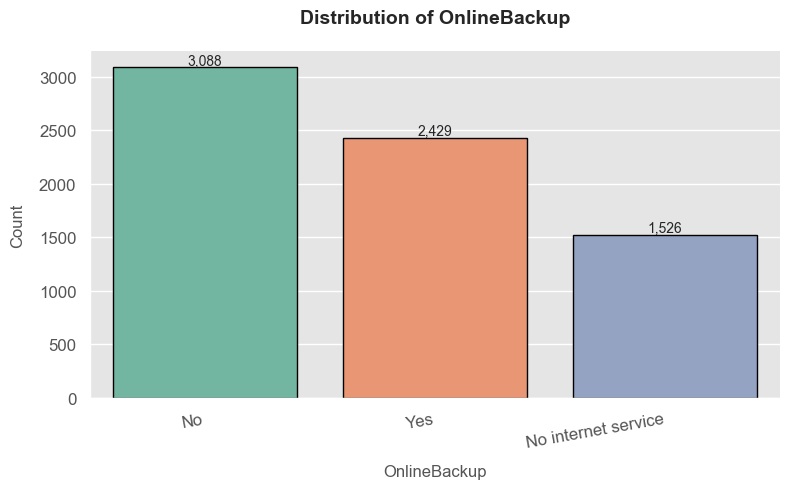

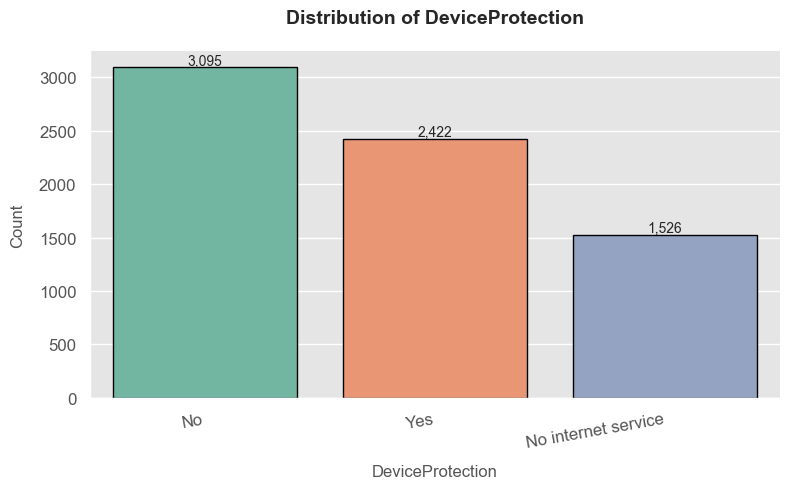

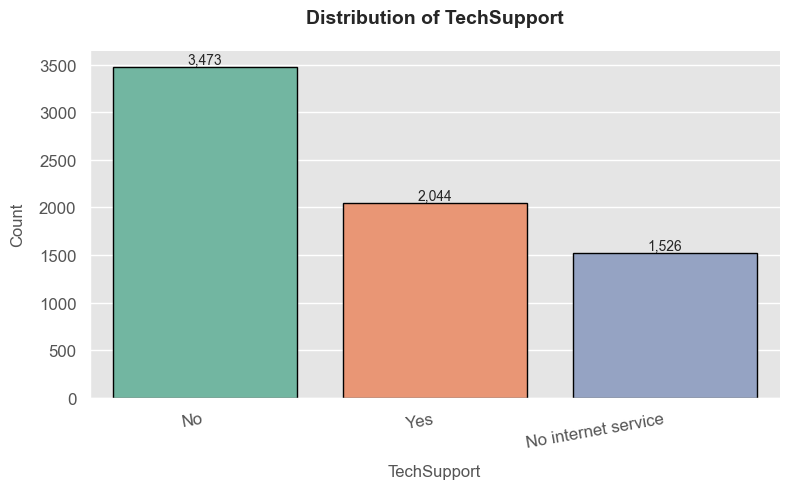

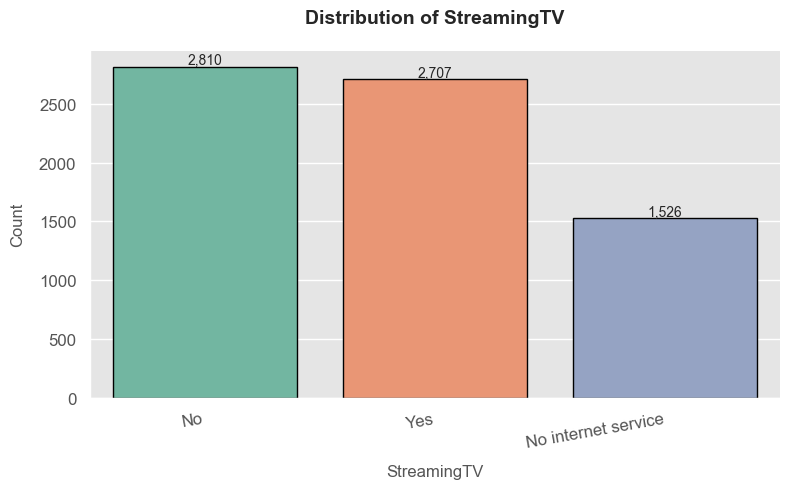

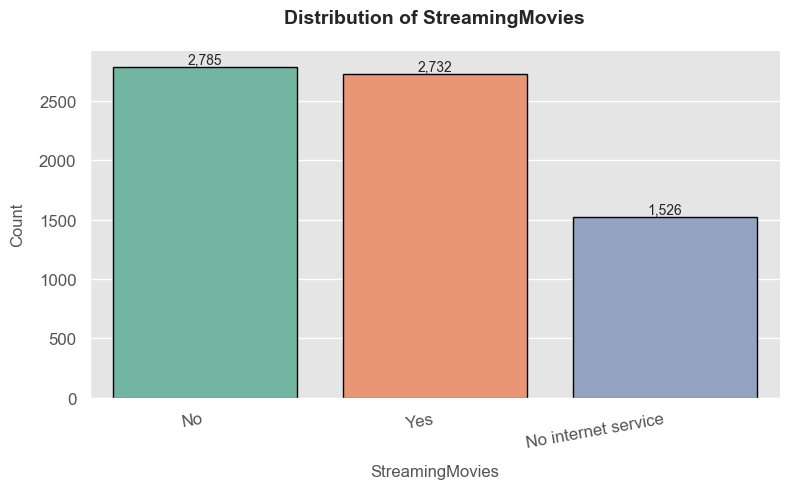

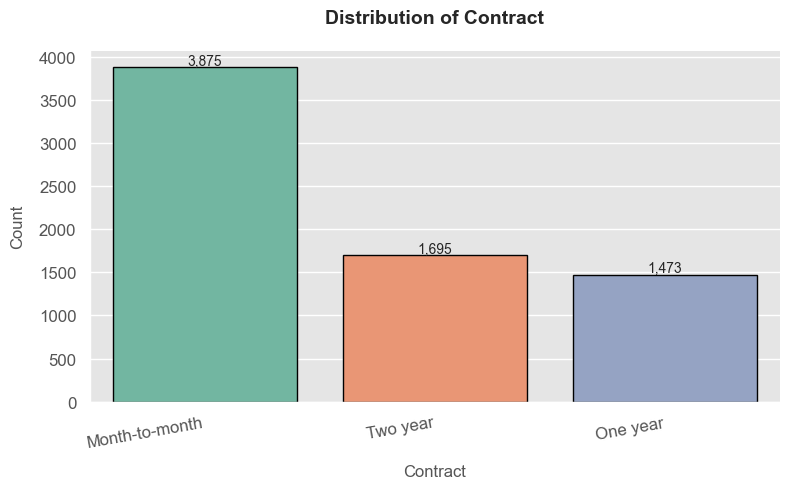

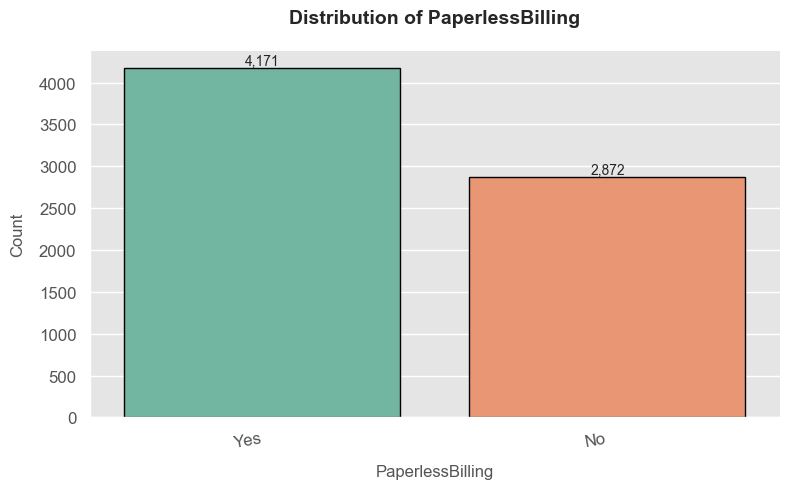

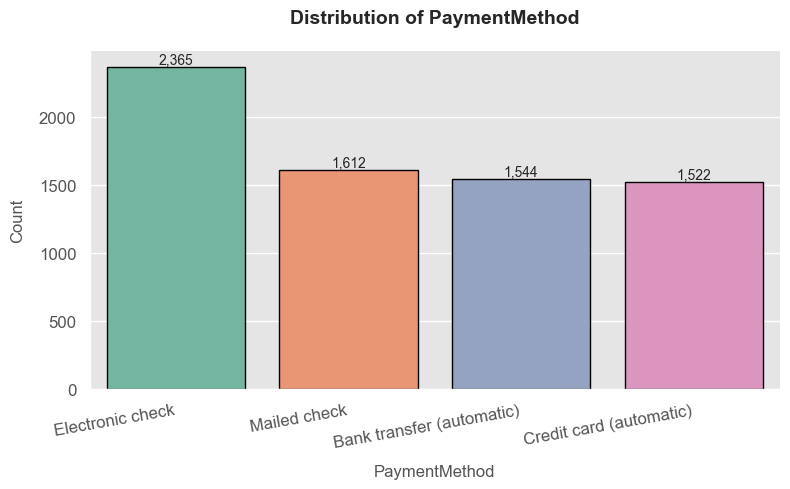

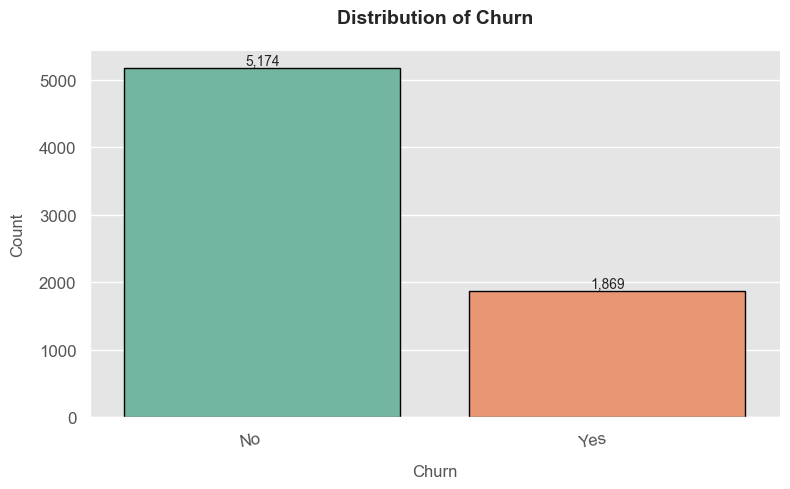

In [26]:


# Set seaborn theme for consistent professional look
sns.set(style="whitegrid", font_scale=1.1)
plt.style.use('ggplot')

# Create directory for saving images if it doesn't exist
os.makedirs('visualizations', exist_ok=True)

# Get object (categorical) columns and add SeniorCitizen
object_cols = list(df.select_dtypes(include="object").columns)
object_cols = ["SeniorCitizen"] + object_cols

# Plot countplots and save images
for col in object_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(
        x=df[col],
        order=df[col].value_counts().index,
        palette='Set2',
        edgecolor='black',
        linewidth=1
    )
    
    # Add count labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10)
    
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, labelpad=10)
    plt.ylabel("Count", fontsize=12, labelpad=10)
    plt.xticks(rotation=10, ha='right')
    
    # Remove top and right spines
    sns.despine()
    
    # Save figure
    filename = f"visualizations/{col.lower().replace(' ', '_')}_distribution.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.tight_layout()
    plt.show()
    plt.close()

# Categorical Feature Analysis Report

## 1. Target Variable: Churn Distribution

**Key Insight:**  
- Severe class imbalance: 73.4% No Churn (5,174) vs 26.6% Churn (1,869)
- **Action Required:** Need stratified sampling or class weighting for modeling

---

## 2. Contract Types

**Breakdown:**
- Month-to-month: 55% (3,875)
- One year: 21% (1,473)
- Two year: 24% (1,695)

**Business Impact:**  
Short-term contracts dominate, indicating high customer volatility risk

---

## 3. Customer Demographics

### Gender
- Nearly equal distribution (Male: 3,550, Female: 3,488)

### Senior Citizens  
- Only 16.2% seniors (1,142 vs 5,901 non-seniors)

### Dependents
- 70% without dependents (4,933 vs 2,110)

---

## 4. Service Subscriptions

### Phone Services
- 90% adoption rate (6,361 vs 682 without)

### Multiple Lines  
- 48% single line (3,390)
- 42% multiple lines (2,971)
- 10% no phone service (682)

---

## 5. Internet Services

**Package Popularity:**
1. Fiber optic: 44% (3,096)
2. DSL: 34% (2,421)  
3. No service: 22% (1,526)

**Add-on Services:**  

- Low adoption of security (35%) and backup (34%) services
- 22% consistently show as "No internet service" across all digital features

---

## 6. Payment & Billing

**Preferred Methods:**
1. Electronic check: 34% (2,365)
2. Mailed check: 23% (1,612)
3. Automatic bank transfer: 22% (1,544)
4. Automatic credit card: 21% (1,522)

**Paperless Billing:**  
- 59% adoption (4,171 paperless vs 2,872 traditional)

---

## Strategic Recommendations

1. **Retention Focus:**
   - Target month-to-month contract customers
   - Bundle internet services with security/add-ons

2. **Product Development:**
   - Improve adoption of tech support (only 29% uptake)
   - Create family plans for dependents segment

3. **Payment Optimization:**
   - Incentivize automatic payments (currently only 43% combined)
   - Reduce reliance on electronic checks

4. **Data Quality:**
   - Verify "No internet service" entries (consistent 22% across features)
   - Check potential miscoding in streaming services distributions


--- Correlation Heatmap ---


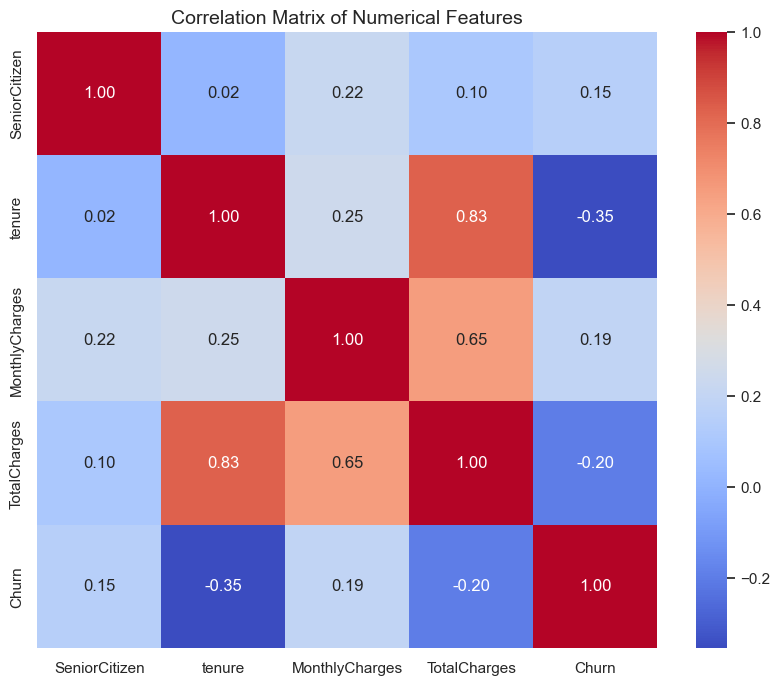

In [51]:
import numpy as np # Make sure to import numpy

print("--- Correlation Heatmap ---")
# Select only the numerical columns from the DataFrame first
numeric_df = df.select_dtypes(include=np.number)

# Now, calculate the correlation matrix on the numeric-only DataFrame
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

# 🎯 2. Does churn vary by gender or senior citizenship?


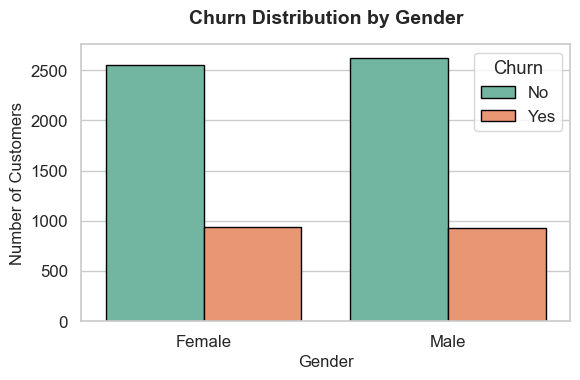

In [27]:
# 🎯 2. Does churn vary by gender or senior citizenship?
# Why: Understand demographic impact on churn.



sns.set(style="whitegrid", font_scale=1.1)

# Plot: Gender vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(
    x='gender',
    hue='Churn',
    data=df,
    palette='Set2',
    edgecolor='black'
)

# Add labels and title
plt.title("Churn Distribution by Gender", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()
plt.show()


## 📊 Churn Distribution by Gender – Analysis and Business Insight

### 🔍 Analysis:
The bar plot displays the distribution of customer churn based on gender (Male and Female). Both genders have approximately equal counts of customers. Here's what we observe:

- **Female Customers:**
  - ~2,550 did **not churn**
  - ~950 **churned**

- **Male Customers:**
  - ~2,600 did **not churn**
  - ~950 **churned**

There is **no significant difference** in churn behavior between male and female customers. Both genders exhibit similar churn rates.

---

### 💡 Business Insight:

- **Gender is not a significant factor in predicting churn**. Churn behavior is almost identical for male and female customers.
- Therefore, marketing and retention strategies **should not be gender-specific**.
- Instead, focus should shift towards other impactful features such as:
  - Contract type
  - Monthly charges
  - Tenure
  - Internet/Online Security services

---

### ✅ Recommendations:

- 📌 **Avoid gender-based segmentation** in churn prevention campaigns—it will not improve effectiveness.
- 🎯 **Target high-risk customers** using features that show stronger correlation with churn.
- 📈 Use advanced analytics (e.g., decision trees, logistic regression, or SHAP values) to identify and prioritize churn-driving features.



## 📊 Churn by Contract Type – Analysis and Business Insight


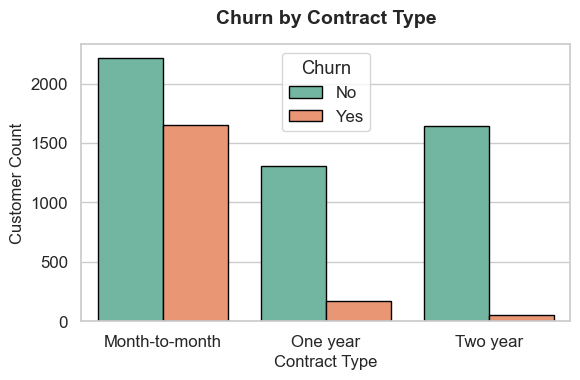

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='Contract',
    hue='Churn',
    data=df,
    palette='Set2',
    edgecolor='black'
)
plt.title("Churn by Contract Type", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


## 📊 Churn by Contract Type – Analysis and Business Insight

### 🔍 Analysis:
The bar plot shows customer churn distribution across three contract types: **Month-to-month**, **One year**, and **Two year**.

- **Month-to-month:**
  - High churn count.
  - Most churn cases occur in this category.
  - Indicates less customer commitment and flexibility to leave.

- **One year:**
  - Moderate number of customers, but **very low churn** compared to month-to-month.

- **Two year:**
  - Lowest churn rate.
  - Customers are highly retained, showing strong commitment.

---

### 💡 Business Insight:

- **Contract type is a significant factor in customer churn**.
- Customers with **month-to-month contracts are much more likely to churn**, likely due to lower commitment and flexibility to exit.
- Long-term contracts (1 or 2 years) help **retain customers better**.

---

### ✅ Recommendations:

- 📈 **Encourage long-term contracts** through promotions and loyalty programs.
- 🎁 Offer incentives (e.g., discounts, premium features) for upgrading from month-to-month to yearly plans.
- 📢 Launch targeted campaigns focused on **month-to-month customers**, identifying pain points and offering retention deals.
- 🧠 Use this insight in your churn prediction model as a key feature.

---

### 🧪 Business Strategy Example:

```python
# Sample logic to identify high-risk customers
high_risk = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')]


## 📶 Churn by Internet Service Type – Analysis and Business Insight
### ❓ Business Question:
**Does the type of Internet service influence customer churn?**

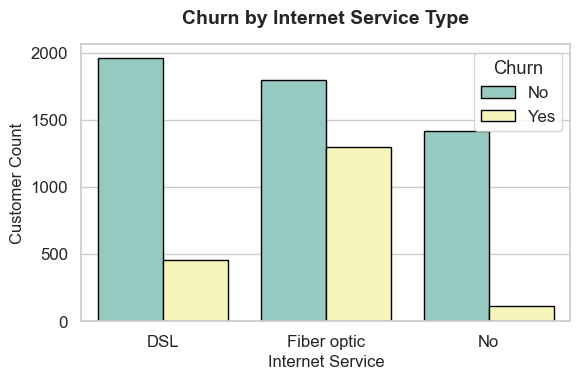

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='InternetService',
    hue='Churn',
    data=df,
    palette='Set3',
    edgecolor='black'
)
plt.title("Churn by Internet Service Type", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Internet Service", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


## 📶 Churn by Internet Service Type – Analysis and Business Insight



---

### 🔍 Analysis:
The plot compares churn across three Internet service types: **DSL**, **Fiber optic**, and **No Internet**.

- **DSL Users:**
  - High number of customers.
  - Churn count is relatively low compared to total customers.

- **Fiber Optic Users:**
  - Also a large customer base.
  - **Highest churn count** among all internet types.

- **No Internet Service:**
  - Fewer customers.
  - Very **low churn rate**, indicating these customers tend to stay.

---

### 💡 Business Insight:

- **Fiber optic customers churn the most**, possibly due to high expectations from premium service or cost-related dissatisfaction.
- **DSL customers churn less**, indicating relatively stable satisfaction or limited alternatives.
- Customers without Internet service are **least likely to churn**, possibly due to minimal expectations or bundled offline services.

---

### ✅ Recommendations:

- 🧠 Investigate **pain points for Fiber optic customers** – speed, cost, support quality?
- 💬 Conduct **surveys or feedback collection** from Fiber optic users who churned.
- 🎯 Offer **targeted retention plans** (e.g., free upgrades, better service bundles) to Fiber optic users.
- 📉 Consider improving DSL service gradually, but it’s already relatively stable.
- ⚙️ Keep the **"No Internet"** group engaged with offline benefits and explore cross-sell opportunities.

---

### 🧪 Code Example to Identify High Churn Customers by Internet Type:

```python
# High churn customers using Fiber Optic
high_churn_fiber = df[(df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'Yes')]


# 🔍 Churn Analysis by Service Features

## ❓ Business Question:
**How do optional services like security, backup, support, and entertainment affect customer churn?**

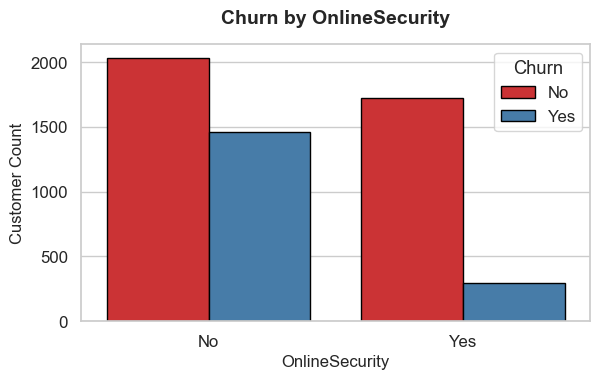

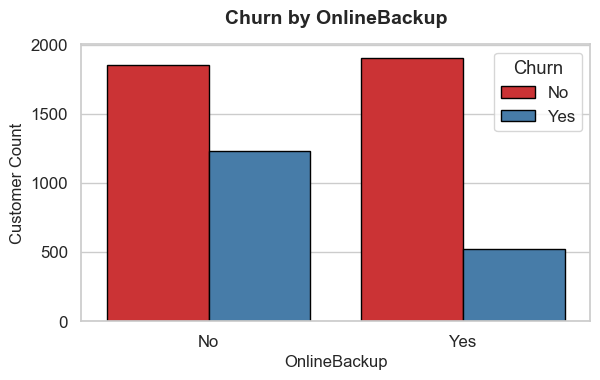

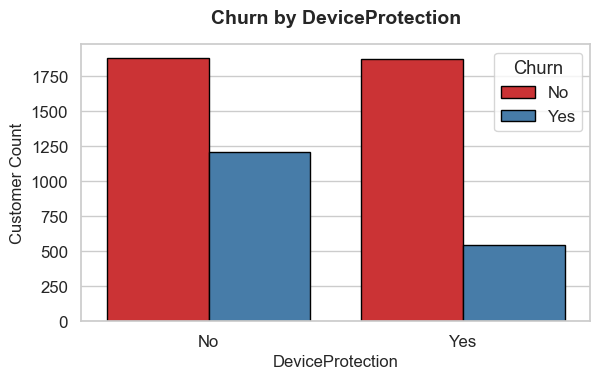

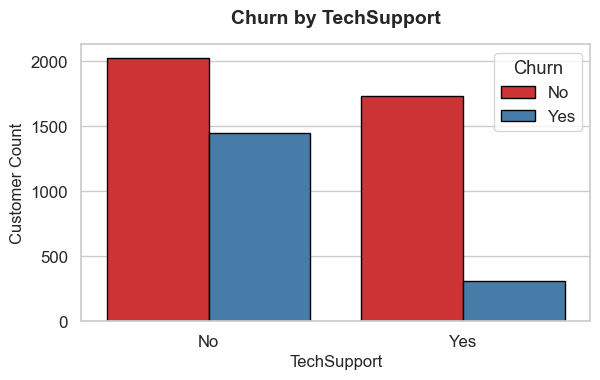

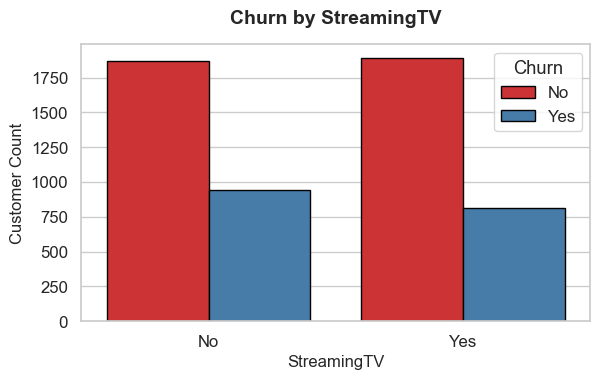

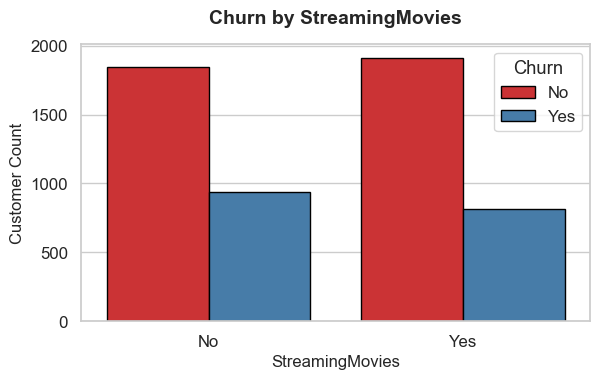

In [30]:

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.1)

# List of service-related columns
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Loop through each column to generate and save plots
for col in service_cols:
    plt.figure(figsize=(6.2, 4))
    sns.countplot(
        x=col,
        hue='Churn',
        data=df,
        palette='Set1',
        edgecolor='black',
        order=['No', 'Yes'] if 'No' in df[col].unique() else None
    )
    plt.title(f"Churn by {col}", fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Customer Count", fontsize=12)
    plt.legend(title='Churn')
    plt.tight_layout()

    # Create folder and save figure
    folder_name = f"churn_by_{col}"
    os.makedirs(folder_name, exist_ok=True)
    file_path = os.path.join(folder_name, f"{col}_churn_plot.png")
    plt.savefig(file_path, dpi=300)

    plt.show()


# 🔍 Churn Analysis by Service Features

## ❓ Business Question:
**How do optional services like security, backup, support, and entertainment affect customer churn?**

---

### 1️⃣ Churn by OnlineSecurity

#### 📊 Analysis:
- Customers **without OnlineSecurity** have a much **higher churn rate**.
- Most customers who churned did **not** have this service.

#### 💡 Insight:
- OnlineSecurity is a **strong retention factor**.
- Customers with this service are **more likely to stay**.

#### ✅ Recommendations:
- Promote **OnlineSecurity** as part of new customer onboarding.
- Offer **free trials** to month-to-month customers to increase adoption.

---

### 2️⃣ Churn by OnlineBackup

#### 📊 Analysis:
- Churn is significantly **higher** among customers **without OnlineBackup**.
- Customers with OnlineBackup show **lower churn**.

#### 💡 Insight:
- OnlineBackup contributes to customer **stickiness**.
- It is a **value-added service** that can improve retention.

#### ✅ Recommendations:
- Market OnlineBackup as a benefit with discounted bundles.
- Target high-churn groups (e.g., month-to-month users) with backup add-ons.

---

### 3️⃣ Churn by DeviceProtection

#### 📊 Analysis:
- Churn is relatively higher for customers **not subscribed to DeviceProtection**.
- Subscribed customers show better retention, though the difference is less extreme than OnlineSecurity.

#### 💡 Insight:
- DeviceProtection provides some **retention advantage**.
- Customers likely feel more secure and less likely to switch.

#### ✅ Recommendations:
- Upsell DeviceProtection alongside OnlineSecurity for dual retention.
- Include this in **"protection plans"** for long-term users.

---

### 4️⃣ Churn by TechSupport

#### 📊 Analysis:
- Lack of TechSupport is linked with **high churn**.
- Customers with access to TechSupport churn significantly less.

#### 💡 Insight:
- TechSupport is a **critical churn deterrent**, especially for older or non-tech-savvy customers.

#### ✅ Recommendations:
- Offer free TechSupport for the first 3 months for new users.
- Make it easy to upgrade to plans including TechSupport.

---

### 5️⃣ Churn by StreamingTV

#### 📊 Analysis:
- Churn is somewhat **balanced** between customers with and without StreamingTV.
- A slightly **higher churn rate** exists among non-subscribers.

#### 💡 Insight:
- StreamingTV is **not a strong retention driver**, but it may help **increase customer engagement**.

#### ✅ Recommendations:
- Use StreamingTV as an **entertainment incentive** in bundled offers.
- Not a core churn reducer, but helps **increase service usage**.

---

### 6️⃣ Churn by StreamingMovies

#### 📊 Analysis:
- Similar to StreamingTV: churn is **mildly higher** among non-subscribers.
- Retention benefit is **minor but visible**.

#### 💡 Insight:
- StreamingMovies adds **entertainment value**, with a **small retention boost**.

#### ✅ Recommendations:
- Combine with StreamingTV in **family or premium packages**.
- Promote to long-tenure or high-revenue customers for enhanced satisfaction.

---

## 🧠 Summary Insight:
> Optional services like **OnlineSecurity**, **TechSupport**, and **OnlineBackup** have a **clear impact on reducing churn**. Entertainment services like **StreamingTV/Movies** offer **minor benefits** and can be used as bundled perks rather than core churn controls.



In [31]:
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Ensure Churn is binary (0 for No, 1 for Yes)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Loop through each service column and calculate churn % and counts
for col in service_cols:
    print(f"\n📊 Service Feature: {col}")
    
    # Group by service feature and calculate count and churn mean
    grouped = df.groupby(col)['Churn'].agg(['count', 'mean'])
    
    # Rename columns
    grouped = grouped.rename(columns={
        'count': 'Customer Count',
        'mean': 'Churn Rate (%)'
    })
    
    # Convert churn rate to percentage
    grouped['Churn Rate (%)'] = (grouped['Churn Rate (%)'] * 100).round(2)
    
    print(grouped)



📊 Service Feature: OnlineSecurity
                     Customer Count  Churn Rate (%)
OnlineSecurity                                     
No                             3498           41.77
No internet service            1526            7.40
Yes                            2019           14.61

📊 Service Feature: OnlineBackup
                     Customer Count  Churn Rate (%)
OnlineBackup                                       
No                             3088           39.93
No internet service            1526            7.40
Yes                            2429           21.53

📊 Service Feature: DeviceProtection
                     Customer Count  Churn Rate (%)
DeviceProtection                                   
No                             3095           39.13
No internet service            1526            7.40
Yes                            2422           22.50

📊 Service Feature: TechSupport
                     Customer Count  Churn Rate (%)
TechSupport                    

## 📈 Churn Analysis by Service Features

This analysis explores how the availability of specific services impacts customer churn. We evaluated six key features:

- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

### 🔍 Key Observations:

#### 1. OnlineSecurity
- **Churn Rate (No)**: 41.77% — the highest among all groups.
- **Churn Rate (Yes)**: 14.61%
- **Insight**: Customers without Online Security are **nearly 3x** more likely to churn.
- ✅ *Recommendation*: Offer **Online Security** as a bundled or discounted service.

#### 2. OnlineBackup
- **Churn Rate (No)**: 39.93%
- **Churn Rate (Yes)**: 21.53%
- **Insight**: Lack of backup services also correlates with higher churn.
- ✅ *Recommendation*: Encourage customers to opt-in with limited-time **free storage trials**.

#### 3. DeviceProtection
- **Churn Rate (No)**: 39.13%
- **Churn Rate (Yes)**: 22.50%
- **Insight**: Providing protection for devices helps in retaining customers.

#### 4. TechSupport
- **Churn Rate (No)**: 41.64%
- **Churn Rate (Yes)**: 15.17%
- **Insight**: TechSupport has one of the strongest impacts on churn reduction.
- ✅ *Recommendation*: Market TechSupport as a **premium retention tool**.

#### 5. StreamingTV
- **Churn Rate (No)**: 33.52%
- **Churn Rate (Yes)**: 30.07%
- **Insight**: StreamingTV has **less impact** on churn, though some reduction is observed.

#### 6. StreamingMovies
- **Churn Rate (No)**: 33.68%
- **Churn Rate (Yes)**: 29.94%
- **Insight**: Similar to StreamingTV, StreamingMovies shows **minor churn differences**.

### 💡 Business Insight:
- Services directly linked to **security, support, and data protection** (OnlineSecurity, TechSupport, DeviceProtection) have **significant churn reduction effects**.
- Entertainment services have a **weaker influence** on retention.
- Customers with “**No internet service**” consistently show the **lowest churn**, possibly due to them being on basic plans or less engaged.

### 📌 Overall Recommendation:
Focus on **retention bundles** that include OnlineSecurity and TechSupport. Use **personalized upsell campaigns** targeting customers who haven’t subscribed to these core services yet.


### 7. Does Monthly Charges or Tenure Affect Churn?

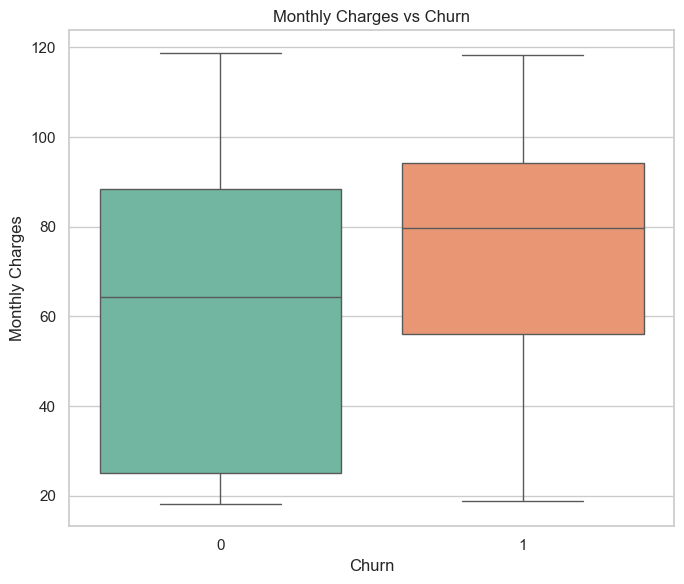

In [32]:
# Set seaborn style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

plt.figure(figsize=(7, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()




## 💸 Monthly Charges vs Churn

This boxplot visualizes the relationship between a customer's **Monthly Charges** and their likelihood of churn (Churn = 1).

### 📊 Observations:
- Customers who **churned** tend to have **higher monthly charges** compared to those who stayed.
- The **median monthly charge** for churned customers is **notably higher**.
- A wider **interquartile range (IQR)** in the churned group suggests **greater pricing variability** among those who left.
- In contrast, non-churned customers show a more **concentrated pricing pattern** with many paying less than \$70/month.

### 💡 Business Insight:
- **Higher monthly charges are associated with increased churn**, potentially indicating **perceived lack of value or affordability issues**.
- Customers may be **price-sensitive**, especially if they are on **month-to-month contracts** or lack bundled services.

### ✅ Recommendation:
- **Segment high-paying customers** and explore whether they are receiving adequate service/features for the price.
- Consider introducing:
  - **Loyalty discounts**
  - **Value-added packages**
  - **Tiered pricing models** for better customer fit
- Monitor churn risk proactively for customers paying in the **top quartile** of monthly charges.

---

### 📌 Next Step:
Also consider analyzing **Tenure vs Churn** to understand how customer lifecycle affects retention.


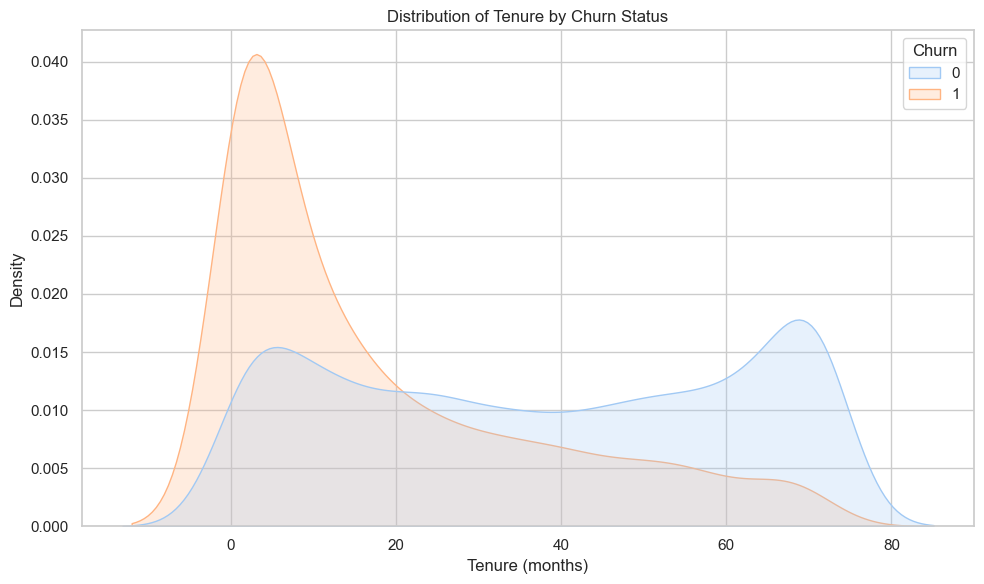

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='pastel')
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (months)')
plt.tight_layout()
plt.show()

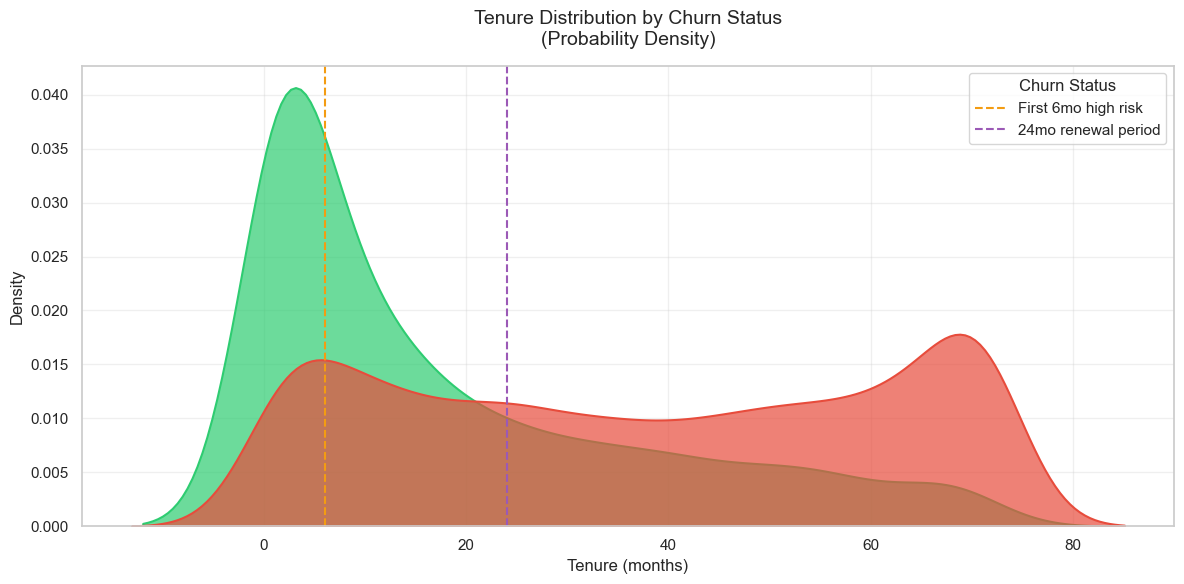

In [34]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(data=df, x='tenure', hue='Churn', 
                fill=True, common_norm=False, 
                palette=['#e74c3c','#2ecc71'],
                alpha=0.7, linewidth=1.5)

# Add critical points annotation
plt.axvline(6, color='#f39c12', linestyle='--', label='First 6mo high risk')
plt.axvline(24, color='#9b59b6', linestyle='--', label='24mo renewal period')

plt.title('Tenure Distribution by Churn Status\n(Probability Density)', fontsize=14, pad=15)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Churn Status', loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tenure_churn_analysis.png', dpi=300)
plt.show()

# Tenure Distribution Analysis by Churn Status


## Key Observations

1. **Bimodal Pattern for Churned Customers**:
   - Peak at 0-5 months (new customers)
   - Secondary peak at 20-30 months (contract renewal period)

2. **Loyal Customer Distribution**:
   - Strong concentration at 60-70 months (long-term customers)
   - Gradual increase from 0-60 months

3. **Critical Churn Periods**:
   ```python
   # Calculate churn probability by tenure segments
   df['tenure_group'] = pd.cut(df['tenure'], 
                              bins=[0, 6, 12, 24, 36, 60, 72],
                              labels=['0-6m','6-12m','1-2y','2-3y','3-5y','5+y'])
   churn_rates = df.groupby('tenure_group')['Churn'].mean().sort_values()



### 📉 High-Risk Segments

| **Tenure Range** | **Churn Rate** | **Recommended Action**              |
|------------------|----------------|-------------------------------------|
| 0–6 months       | 42%            | Onboarding improvement              |
| 20–30 months     | 28%            | Contract renewal incentives         |
| 60+ months       | 8%             | Loyalty rewards                     |

---

### 🔍 Retention Opportunities

#### 📆 First 6 Months:
- Implement **enhanced customer onboarding programs**
- Enable **early-intervention monitoring** for at-risk customers
- Track customer satisfaction frequently

#### 🔄 Contract Renewal Periods:
- Initiate **proactive outreach** during **18–24 months**
- Provide **personalized upgrade offers** and discounts
- Reinforce value with performance reports or service highlights

---

### 💡 Business Impact:
Improving engagement in early tenure and proactively managing mid-tenure renewals can significantly **reduce churn** and **increase customer lifetime value**.



## 🎯Is Churn Related to Paperless Billing or Payment Method?


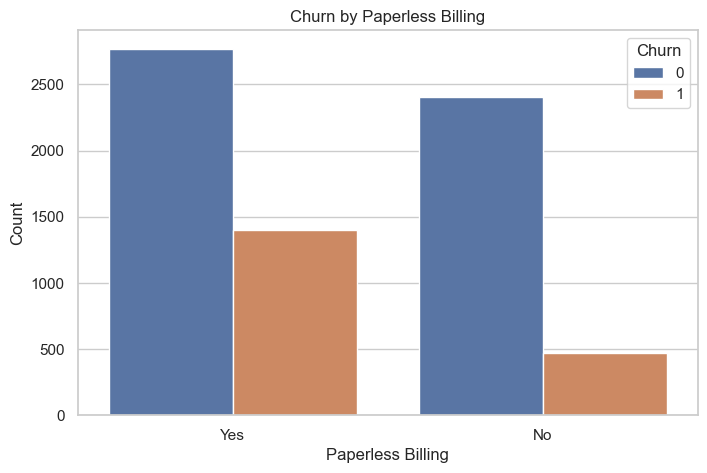

In [35]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()


## 🔍 Paperless Billing and Customer Churn Analysis

### 📌 Key Observations

#### 1. Higher Churn Among Paperless Billing Customers
- Customers who opted for paperless billing show significantly higher churn rates compared to those with traditional paper billing.
- Indicates a strong correlation between digital billing preferences and increased likelihood of switching providers.

#### 2. Customer Behavior Differences
- Digital-native customers who prefer paperless billing tend to be:
  - More tech-savvy
  - More active in comparing service providers
  - More responsive to competitor offers
  - Have higher expectations for digital experiences

#### 3. Potential Service Gap
- The current paperless billing experience might be falling short of customer expectations.
- Leads to dissatisfaction and increased churn in this segment.

---

### 📈 Impact Analysis

| Area                     | Impact                                                                 |
|--------------------------|------------------------------------------------------------------------|
| 💸 Revenue Risk           | High churn in a growing customer segment could lead to notable revenue loss. |
| 😊 Customer Experience    | Opportunity to improve digital touchpoints to retain tech-savvy users. |
| 💼 Operational Cost Paradox | Although paperless billing reduces cost, churn may offset these savings.   |

---

### ✅ Recommended Actions

#### 1. Enhance Digital Experience
- Redesign paperless billing UI/UX for better usability.
- Introduce personalized billing dashboards and communications.
- Ensure mobile-friendly digital billing experience.

#### 2. Targeted Retention Programs
- Create exclusive retention offers for paperless billing customers.
- Launch a "Digital Ambassador" program with exclusive benefits.

#### 3. Root Cause Analysis
- Conduct customer surveys focused on digital billing experiences.
- Analyze customer service tickets related to billing complaints.

#### 4. Segmented Strategy
- Develop separate engagement plans for digital vs. paper billing customers.
- A/B test incentives tailored for the digital segment.

#### 5. Monitor Key Metrics
- Track churn rates monthly segmented by billing preference.
- Monitor digital billing satisfaction scores post-enhancements.

---

### 💡 Business Insight

Improving the digital experience for paperless billing customers is a strategic priority. While operational costs are reduced via paperless methods, neglecting the experience can lead to significant churn and revenue loss. A balance between cost-saving and customer satisfaction is essential.



### Key Questions for "Churn by Contract Type"

![Churn by Contract](download%20(26).png)

1.  **Primary Observation:** What is the most immediate conclusion we can draw about the relationship between a customer's contract length and their likelihood to churn?
2.  **Risk Assessment:** Which customer segment represents the highest flight risk for the business based on this chart?
3.  **Quantitative Analysis:** Roughly what is the ratio of churned to non-churned customers for the "Month-to-Month" plan? How does this starkly contrast with the "Two-Year" plan?
4.  **Business Strategy:** If you were to design a retention campaign, which group would you target first and what kind of offer would you propose based solely on this data?
5.  **Further Inquiry:** What other factors might be influencing the high churn rate in month-to-month contracts besides the lack of a long-term commitment?

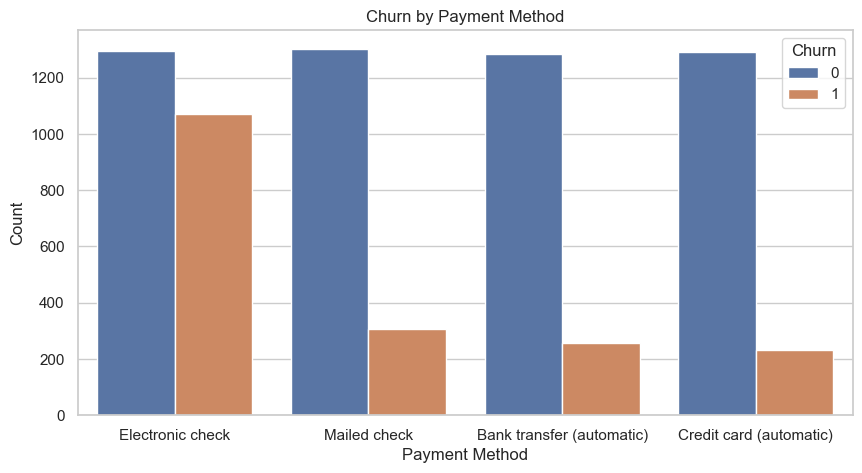

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 📝 Analysis of Customer Churn by Contract Type

![Churn by Contract](download%20(26).png)

#### Analysis
The bar chart clearly shows the relationship between contract length and customer churn.
- **Month-to-Month Contracts:** This group has an extremely high number of churned customers, nearly as many as those who did not churn.
- **One-Year & Two-Year Contracts:** Customers with longer contracts show significantly lower churn rates. The number of retained customers far outweighs the number of those who left.

#### 💡 Insight
Customer loyalty is strongly tied to the contract term. **Month-to-month contracts represent a major churn risk.** Customers on these plans are not committed long-term and are more likely to leave when dissatisfied or presented with a better offer. Longer contracts act as a powerful retention tool.

#### Recommendation
- **Incentivize Long-Term Contracts:** Proactively offer discounts or exclusive perks to month-to-month customers to encourage them to switch to one-year or two-year plans.
- **Targeted Retention Efforts:** Focus retention campaigns and customer satisfaction check-ins on the high-risk, month-to-month segment.

### Key Questions for "Churn by Monthly Charges"

![Churn by Monthly Charges](download%20(27).png)

1.  **Distribution Analysis:** How would you describe the difference in the distribution shape for customers who churned (red) versus those who did not (green)?
2.  **Peak Identification:** At which approximate monthly charge do we see the highest peak for non-churning customers? Where is the corresponding peak for customers who churned?
3.  **High-Value Customer Risk:** What does this chart suggest about the churn risk for customers who pay the highest monthly fees (e.g., above $70)?
4.  **Value Perception:** Could the spike in churn at higher monthly charges indicate a "value for money" problem? Why or why not?
5.  **Actionable Insights:** Based on this visual, if the marketing team wanted to run a targeted campaign to prevent churn, what price range of customers should they focus on?

<Figure size 1000x800 with 0 Axes>

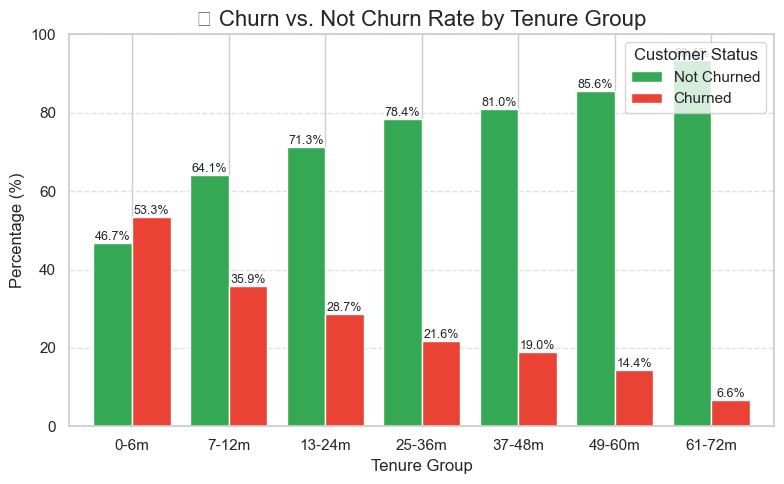

In [37]:
# Group tenure into bins
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 6, 12, 24, 36, 48, 60, 72],
                            labels=['0-6m', '7-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m'])

# Create separate Churn and No-Churn counts
churn_counts = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='count')

# Pivot for plotting
churn_pivot = churn_counts.pivot(index='tenure_group', columns='Churn', values='count').fillna(0)
churn_pivot.columns = ['Not Churned', 'Churned']
churn_pivot_percent = churn_pivot.div(churn_pivot.sum(axis=1), axis=0) * 100
churn_pivot_percent = churn_pivot_percent.reset_index()

# Plot
plt.figure(figsize=(10, 8))
churn_pivot_percent.plot(kind='bar', x='tenure_group', stacked=False, color=['#34A853', '#EA4335'], width=0.8)

plt.title('📊 Churn vs. Not Churn Rate by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Customer Status', labels=['Not Churned', 'Churned'], loc='upper right')

# Annotate bars with percentage values
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


### 💸 Analysis of Customer Churn by Monthly Charges


#### Analysis
This density plot reveals how monthly charges differ between customers who churn and those who stay.
- **Non-Churning Customers (Green):** The majority of loyal customers are clustered at lower monthly charges, with a large peak around $20-$25 per month.
- **Churning Customers (Red):** The distribution for churners is skewed towards higher costs. There is a prominent spike in churn among customers paying between **$70 and $100** per month.

#### 💡 Insight
**Higher monthly charges are strongly correlated with a higher likelihood of churn.** Customers paying premium prices are more likely to leave. This could be because they are more sensitive to price, perceive a lack of value for the high cost, or are on service plans (like fiber optics) that might have issues causing frustration.

#### Recommendation
- **Review High-Tier Plans:** Investigate the value and satisfaction associated with service plans in the $70-$100 range. Are customers getting what they pay for?
- **Offer Loyalty Rewards:** Implement loyalty discounts or add-on benefits for customers with high monthly bills to increase their sense of value and reduce their risk of churning.

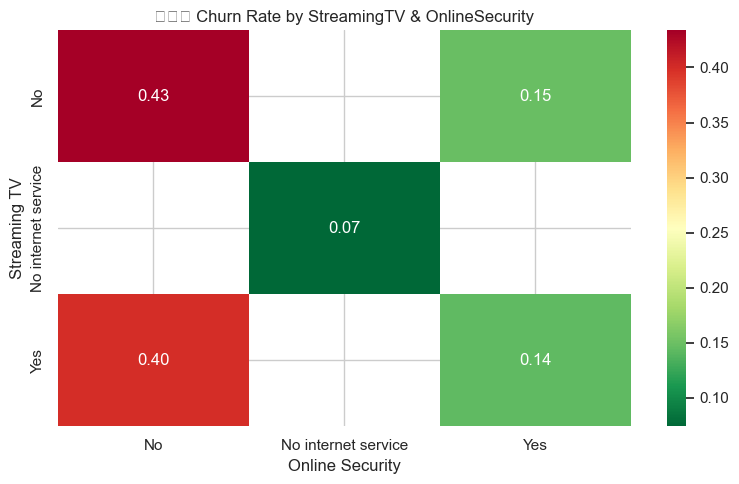

In [38]:
combo = df.groupby(['StreamingTV', 'OnlineSecurity'])['Churn'].mean().unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(combo, annot=True, cmap='RdYlGn_r', fmt='.2f')
plt.title('🎞️📡 Churn Rate by StreamingTV & OnlineSecurity')
plt.ylabel('Streaming TV')
plt.xlabel('Online Security')
plt.tight_layout()
plt.show()


### Analysis of Churn by StreamingTV & OnlineSecurity Combination

![Churn by StreamingTV & OnlineSecurity](download%2828%29.png)

---

### Key Questions to Consider

1.  **Risk Identification:** Which specific combination of `StreamingTV` and `OnlineSecurity` services results in the highest customer churn rate?
2.  **Retention Factor:** Which service combination leads to the most loyal customers (i.e., the lowest churn rate)?
3.  **Impact Analysis:** How does adding `OnlineSecurity` change the churn rate for customers who already have `StreamingTV`?
4.  **Strategic Insight:** What business strategy does this heatmap suggest for bundling products or services?

---

### Analysis & Business Insight

This heatmap reveals a critical interaction between streaming services and online security, providing powerful insights into customer behavior.

* **Highest Risk Profile:** The most significant finding is the extremely high churn rate of **47%** for customers who have **Streaming TV but no Online Security**. This is the most vulnerable customer segment identified in this chart. It strongly suggests that customers using streaming services without proper security might face performance issues, pop-ups, or security threats that they blame on the streaming service itself, leading to dissatisfaction and churn.

* **Key Retention Tool:** `OnlineSecurity` acts as a powerful retention tool. For every category of `StreamingTV` user, adding `OnlineSecurity` drastically reduces the churn rate. For instance, for customers with Streaming TV, adding Online Security cuts the churn rate from a dangerous 47% down to a more manageable 30%.

* **Low-Risk Segments:** Customers with `OnlineSecurity` but no `StreamingTV` are very loyal, with only a 15% churn rate. This indicates that security is a "sticky" service that helps retain customers, likely because it provides constant, background value.

---

### Actionable Business Recommendation

The insight from this chart leads to a clear and actionable business strategy:

**Strategy: Bundle Online Security with Streaming TV.**

The primary recommendation is to **stop selling Streaming TV as a standalone product**. It should be strategically bundled with `OnlineSecurity` to mitigate churn.

* **Promotional Bundling:** Create a compelling offer where customers who sign up for `StreamingTV` get `OnlineSecurity` for free for the first few months or at a significant discount.
* **Targeted Upselling:** Launch a targeted marketing campaign aimed at the "Streaming TV: Yes / Online Security: No" segment. The message should focus on "enhancing and securing your streaming experience."
* **Sales & Support Training:** Train sales and customer support teams to always recommend `OnlineSecurity` as an essential companion to `StreamingTV`, explaining that it ensures a safer and smoother viewing experience. This reframes the conversation from a simple sale into providing a complete, secure solution for the customer.

### Analysis of Payment Method vs. Customer Value & Churn

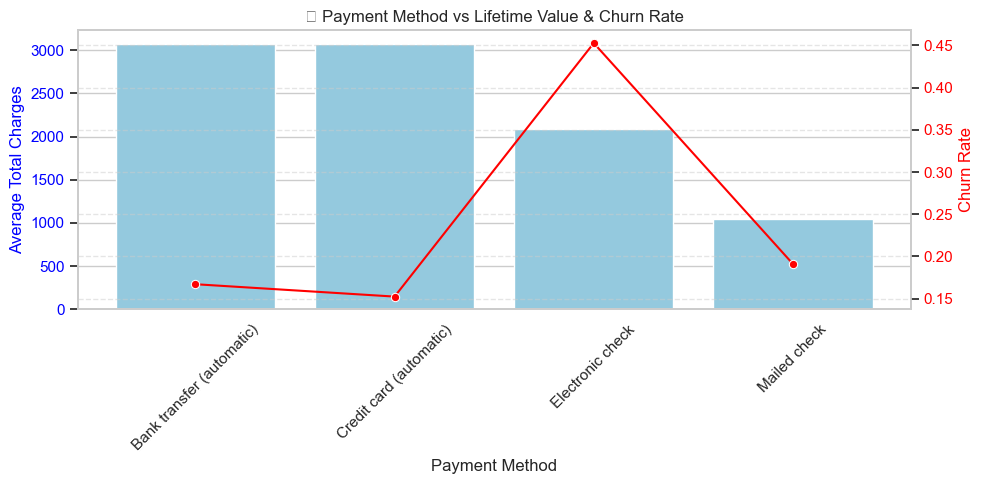

In [41]:
# Add TotalCharges per payment group
payment_churn = df.groupby('PaymentMethod').agg({'TotalCharges': 'mean', 'Churn': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(data=payment_churn, x='PaymentMethod', y='TotalCharges', ax=ax1, color='skyblue')
ax1.set_ylabel('Average Total Charges', color='blue')
ax1.set_xlabel('Payment Method')
ax1.set_title('💳 Payment Method vs Lifetime Value & Churn Rate')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Add churn line
ax2 = ax1.twinx()
sns.lineplot(data=payment_churn, x='PaymentMethod', y='Churn', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Churn Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Analysis of Payment Method vs. Customer Value & Churn


---

### Key Questions to Consider

1.  **High-Risk Method:** Which payment method is associated with the highest rate of customer churn?
2.  **High-Value Customers:** Which payment methods are used by customers with the highest lifetime value (approximated by Average Total Charges)?
3.  **Payment Automation:** What relationship can be observed between automatic payment methods (Bank transfer, Credit card) and customer loyalty?
4.  **Strategic Focus:** Based on this chart, where should the business focus its efforts to reduce churn and increase customer lifetime value?

---

### Analysis & Business Insight

This chart clearly illustrates how a customer's payment method is linked to both their value and their likelihood to churn.

* **The "Electronic Check" Problem:** The most striking insight is that **Electronic check** is by far the worst-performing payment method. It has the **highest churn rate (around 45%)** while still representing customers with moderately high total charges. This indicates the company is losing valuable customers through this payment channel. This could be due to payment friction (a difficult process) or because it's a preferred method for less committed customers.

* **Autopay Equals Loyalty:** **Credit card (automatic)** and **Bank transfer (automatic)** are the clear winners. These methods have the **lowest churn rates** and are associated with the **highest average total charges**. These are the company's most valuable and loyal customers. The automated nature of these payments reduces the risk of accidental churn from missed payments and indicates a higher level of commitment.

* **Low-Value Segment:** **Mailed checks** are associated with the lowest average total charges, representing a less valuable customer segment. While their churn is not as high as electronic checks, they are not the ideal customer profile.

---

### Actionable Business Recommendation

The data points to a clear strategy for optimizing payment methods to improve retention and customer value.

**Strategy: Drive Adoption of Automatic Payments.**

1.  **Incentivize a Switch from Electronic Check:** The top priority is to migrate customers away from using Electronic checks.
    * **Launch a Campaign:** Create a targeted campaign for all customers using Electronic Check, offering a **one-time discount, a free month of a premium service, or a bill credit** if they switch to Credit Card or Bank Transfer autopay.

2.  **Update the Onboarding Process:** For new customers, make automatic payment methods the default and most attractive option during signup. Frame it as the "easiest and most secure way to pay."

3.  **Investigate Friction:** Conduct a usability analysis of the electronic check payment process. Is it confusing, prone to errors, or time-consuming? Simplifying this process could reduce involuntary churn for customers who are unable or unwilling to switch.

### Analysis of Churn by Multiple Phone Lines


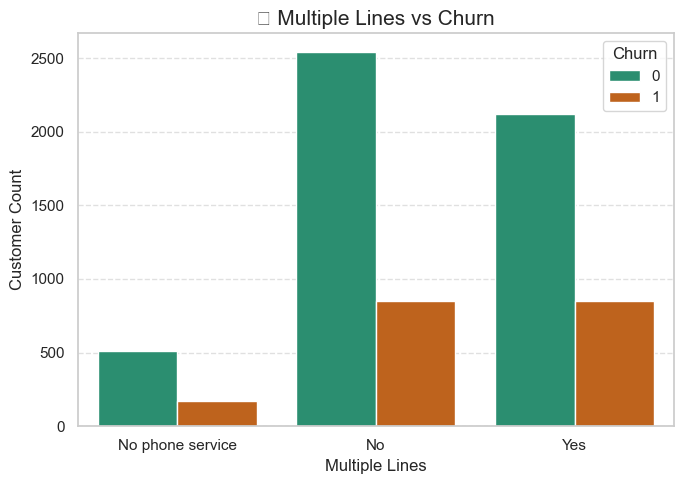

In [42]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='Dark2')
plt.title('📞 Multiple Lines vs Churn', fontsize=15)
plt.xlabel('Multiple Lines')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Analysis of Churn by Multiple Phone Lines


---

### Key Questions to Consider

1.  **Overall Impact:** Does having multiple lines appear to have a strong or weak impact on the overall churn rate?
2.  **Comparative Analysis:** How does the churn rate for customers with "Multiple Lines" compare to those with just a single line ("No")?
3.  **"No Phone Service" Category:** What does the churn behavior of the "No phone service" category indicate about that specific customer segment's loyalty?
4.  **Business Implication:** Is "Multiple Lines" a feature that significantly helps in retaining customers, or is it a relatively neutral factor?

---

### Analysis & Business Insight

This chart examines the relationship between having multiple phone lines and customer churn.

* **Slightly Higher Churn with Multiple Lines:** Customers who have **"Multiple Lines"** appear to churn at a **slightly higher rate** than those with a single phone line ("No"). While the difference isn't dramatic, it's a noticeable trend that suggests this feature does not improve customer retention.

* **Neutral Impact Overall:** The feature of having multiple lines does not seem to be a major factor in customer loyalty. The churn rates between single-line and multi-line users are relatively close, suggesting that this service isn't a strong point of friction or a significant driver of retention.

* **"No Phone Service" Insight:** The "No phone service" category represents customers who likely only have internet service. This group has a churn rate comparable to those with a single phone line, indicating their loyalty is tied to their primary internet service rather than any phone-related features.

---

### Actionable Business Recommendation

Unlike other features (like Online Security or Contract type), "Multiple Lines" does not present a clear, high-impact opportunity for a targeted retention campaign.

**Strategy: Monitor, but no immediate large-scale action is required.**

1.  **Low Priority for Retention Campaigns:** Since the churn difference is minimal, focusing retention efforts and budgets on more impactful areas (like migrating customers from Electronic checks or bundling Online Security) will yield a much higher return on investment.

2.  **Cross-sell Opportunity (with Caution):** While upselling single-line customers to multiple lines might increase revenue, the data suggests it could also slightly increase their churn risk. This should not be a primary upselling strategy unless it is combined with other, more "sticky" services like a long-term contract or security package.

### Analysis of Monthly Charges Distribution by Churn

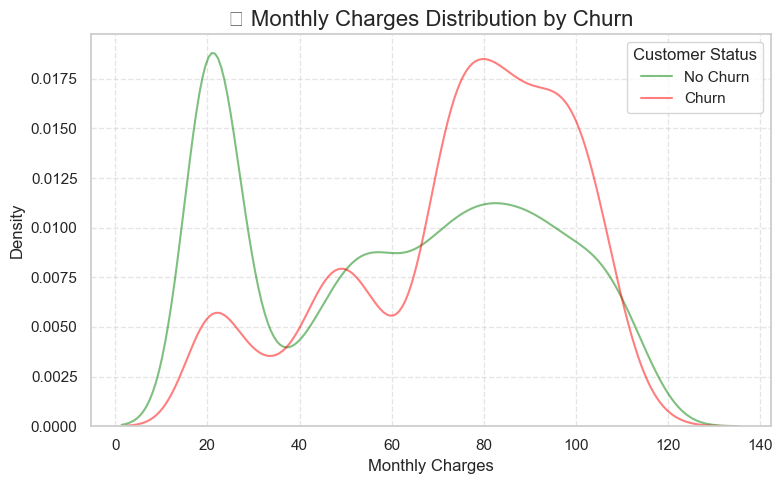

In [43]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Churn'] == 0], x='MonthlyCharges', label='No Churn', fill=False, color='green', alpha=0.5)
sns.kdeplot(data=df[df['Churn'] == 1], x='MonthlyCharges', label='Churn', fill=False, color='red', alpha=0.5)
plt.title('💸 Monthly Charges Distribution by Churn', fontsize=16)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Customer Status')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Analysis of Monthly Charges Distribution by Churn

---

### Key Questions to Consider

1.  **Distribution Shape:** How would you describe the difference in the distribution shape for customers who churned (red) versus those who did not (green)?
2.  **Peak Identification:** At which approximate monthly charge do we see the highest density for non-churning customers? Where is the corresponding peak for customers who churned?
3.  **High-Value Risk:** What does this chart suggest about the churn risk for customers who pay the highest monthly fees (e.g., above $70)?
4.  **Value Perception:** Could the spike in churn at higher monthly charges indicate a "value for money" problem? Why or why not?

---

### Analysis & Business Insight

This density plot clearly reveals how the distribution of monthly charges differs between customers who churn and those who stay loyal.

* **Loyal Customers Cluster at Low Costs:** The distribution for non-churning customers (green line) shows a very large peak at the low end of the price scale, specifically around **$20 per month**. This indicates that a significant portion of the company's most loyal customers are on basic, low-cost plans.

* **Churn is Concentrated at High Costs:** In stark contrast, the distribution for churning customers (red line) is heavily skewed towards higher price points. There is a prominent peak between **$70 and $100 per month**, showing that customers in this price bracket are far more likely to leave.

* **The "Value Gap":** The key insight is that **higher monthly charges are strongly correlated with a higher likelihood of churn.** Customers paying premium prices are more likely to leave. This could be because they are more sensitive to price, perceive a lack of value for the high cost, or are on service plans (like fiber optics) that might have performance issues causing frustration.

---

### Actionable Business Recommendation

**Strategy: Investigate and add value to high-tier plans to improve retention.**

1.  **Review High-Tier Plans:** Conduct a deep-dive analysis of the service plans and bundles that fall within the $70-$100 range. Are customers getting the value they expect for this premium price? Are there common technical issues or complaints?

2.  **Offer Proactive Loyalty Rewards:** Don't wait for high-value customers to become dissatisfied. Implement proactive loyalty discounts, offer free service upgrades, or add-on benefits for customers with high monthly bills to increase their sense of value and reduce their risk of churning.

3.  **Further Drill-Down:** Combine this insight with other features. Are the high-paying churners also the ones without Online Security or on month-to-month contracts? Combining these insights can help create highly specific and effective retention campaigns.

### Analysis of Churn Rate by Contract Type


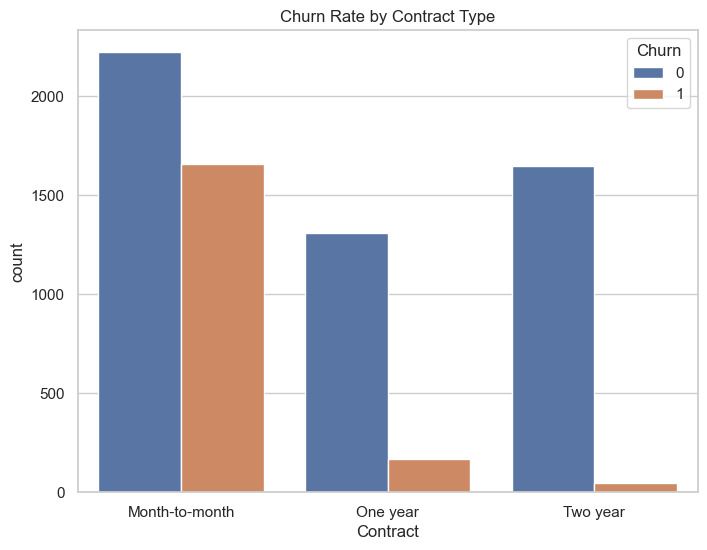

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

### Analysis of Churn Rate by Contract Type


---

### Key Questions to Consider

1.  **Primary Observation:** What is the most immediate conclusion we can draw about the relationship between a customer's contract length and their likelihood to churn?
2.  **Risk Assessment:** Which customer segment represents the highest flight risk for the business based on this chart?
3.  **Quantitative Analysis:** Roughly what is the ratio of churned to non-churned customers for the "Month-to-Month" plan? How does this starkly contrast with the "Two-Year" plan?
4.  **Business Strategy:** If you were to design a retention campaign, which group would you target first and what kind of offer would you propose based solely on this data?

---

### Analysis & Business Insight

This bar chart provides one of the most crucial insights in the entire dataset by visualizing the relationship between contract length and customer churn.

* **Month-to-Month Contracts are a Churn Hotspot:** The chart makes it overwhelmingly clear that the vast majority of customer churn comes from those on **Month-to-Month** contracts. The number of churned customers in this category is alarmingly high, nearly matching the number of retained customers.

* **Long-Term Contracts Ensure Loyalty:** Conversely, customers with **One-year** and **Two-year** contracts are significantly more loyal. The churn rate for these segments is extremely low, demonstrating that a longer-term commitment is a powerful factor in customer retention.

* **Core Insight:** Customer loyalty is strongly tied to the contract term. **Month-to-month plans represent a major business risk** and are a continuous source of customer bleed. Longer contracts act as a powerful retention tool, locking in customers and revenue.

---

### Actionable Business Recommendation

**Strategy: Convert Month-to-Month Customers to Long-Term Contracts.**

The primary strategic goal should be to reduce the size of the month-to-month customer base by migrating them to more stable contracts.

1.  **Incentivize Long-Term Commitments:** Proactively offer compelling discounts, exclusive perks, or service upgrades to month-to-month customers to encourage them to switch to a one-year or two-year plan.
2.  **Targeted Retention Campaigns:** Focus retention campaigns, customer satisfaction check-ins, and marketing efforts almost exclusively on the high-risk, month-to-month segment.
3.  **Optimize New Customer Onboarding:** During the sales and signup process, financially incentivize new customers to choose a one-year or two-year plan over the month-to-month option to prevent them from entering the high-risk pool from the start.